In [1]:
from spline_learner_poe4d_MM import *
from spline_learner_poe_old import *
import matplotlib.pyplot as plt

np.random.seed(1)
spl = SplineLearnerPOE_4D(use_mm = 0, bypass_f1 = True)

/Users/jendawk/Dropbox (MIT)/Microbiome/POE_learner/helper.py:21: RuntimeWarning: overflow encountered in multiply
  out2 = np.array([[(a[i, j]*x[:, i]*x[:, j]*b[i, j])/(b[i, j] + ii*x[:, i]) for j in range(a.shape[0])] for i in range(a.shape[0])])
/Users/jendawk/Dropbox (MIT)/Microbiome/POE_learner/helper.py:25: RuntimeWarning: overflow encountered in double_scalars
  [a[i, i]*(x[k, i]**2) for i in range(a.shape[0])]))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/jendawk/Dropbox (MIT)/Microbiome/POE_learner/helper.py:50: RuntimeWarning: invalid value encountered in less
  zidxs = np.where(xout < 0)
/Users/jendawk/Dropbox (MIT)/Microbiome/POE_learner/spline_learner_poe4d_MM.py:86: RuntimeWarning: overflow encountered in multiply
  self.X1[:,i]*self.X1[:,j])+.01, self.num_knots) for i in range(self.num_bugs)]

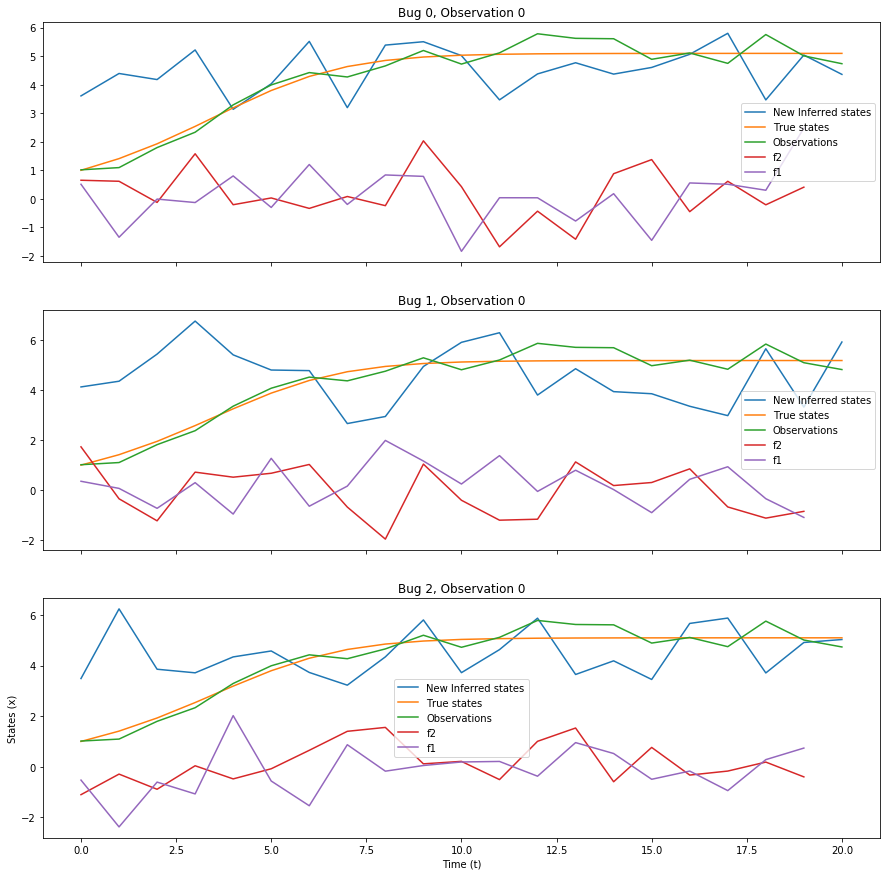

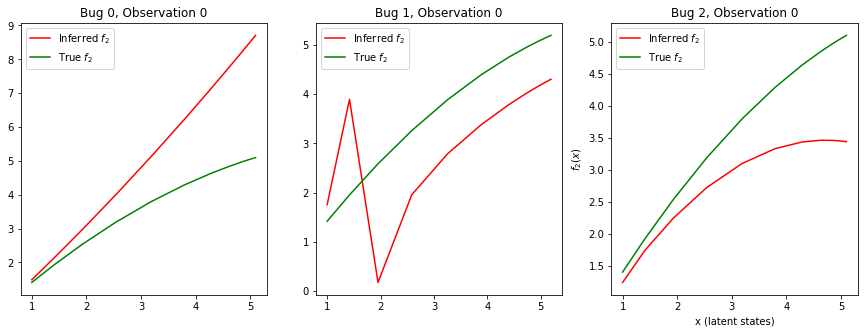

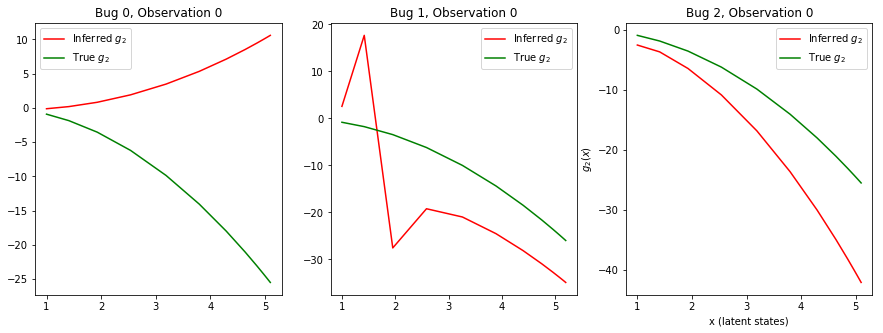

/Users/jendawk/Dropbox (MIT)/Microbiome/POE_learner/spline_learner_poe4d_MM.py:315: RuntimeWarning: overflow encountered in exp
  prob_keep = np.exp(np.sum(num, 0) - np.sum(dem, 0))


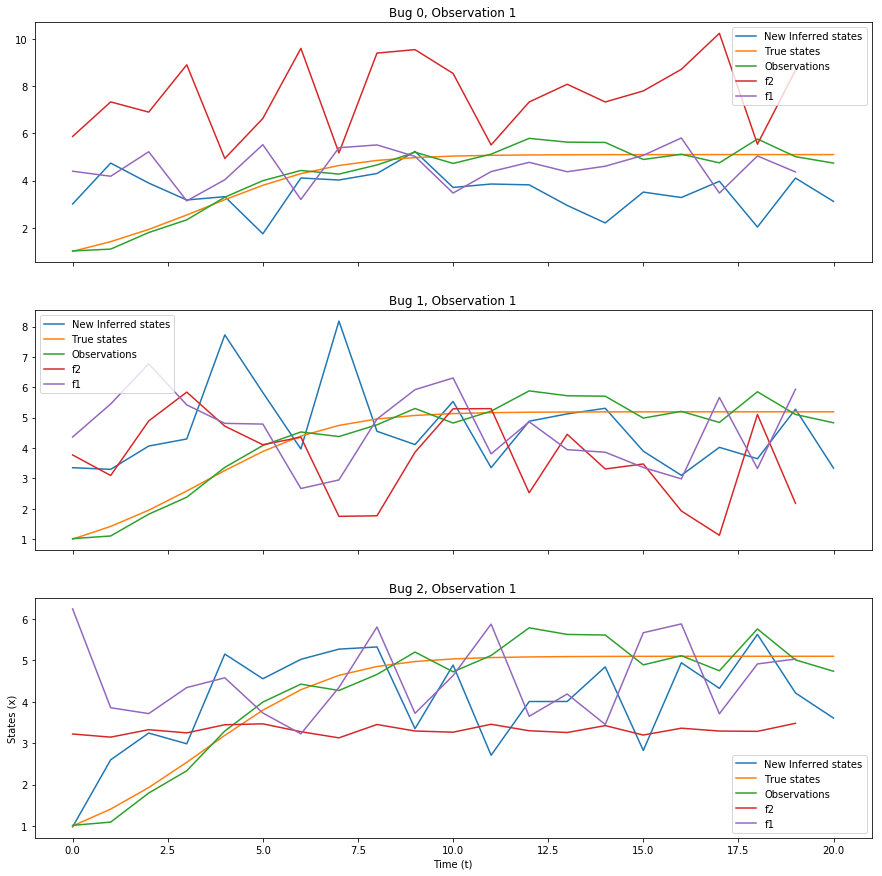

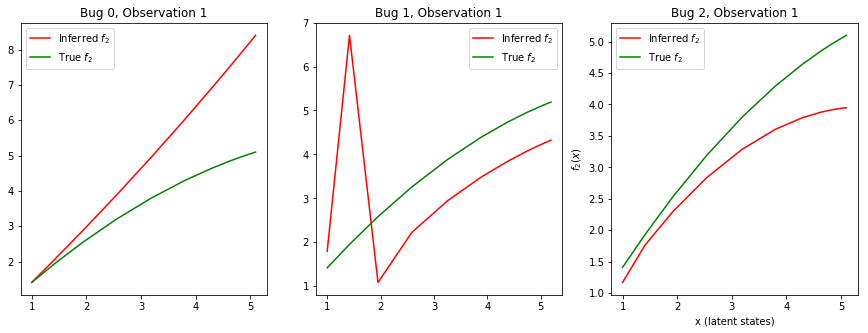

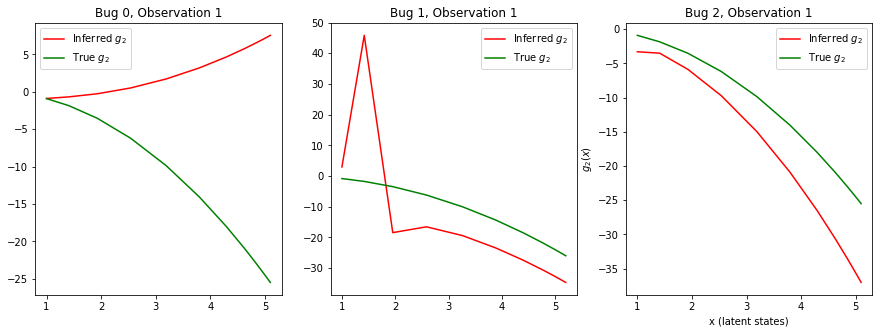

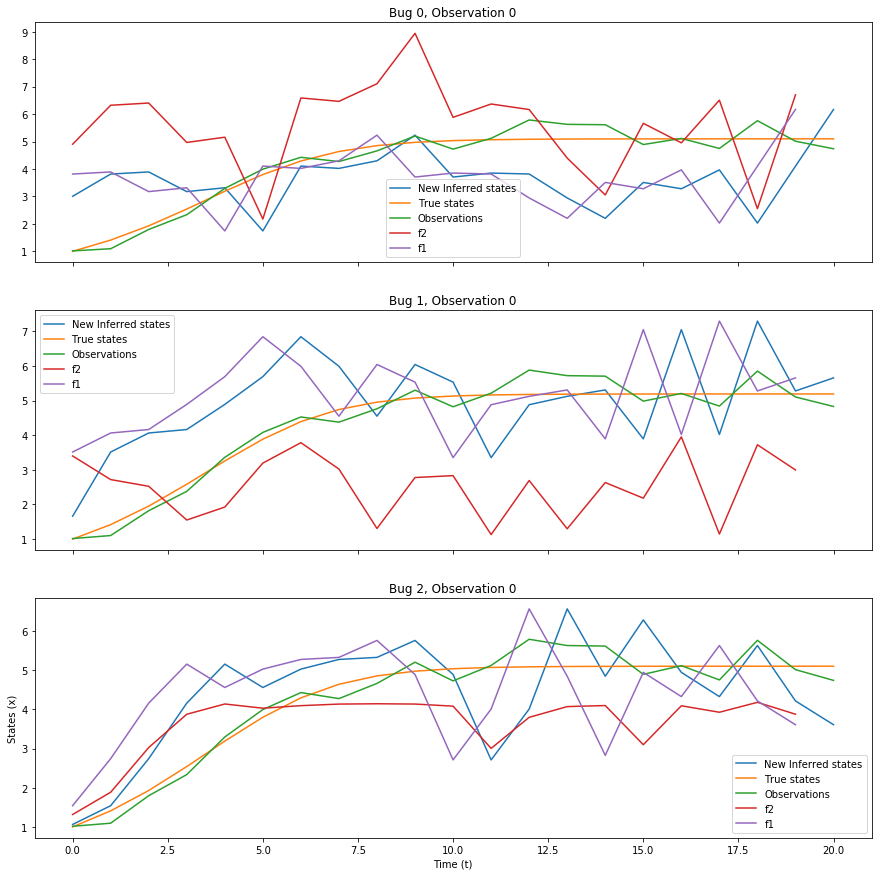

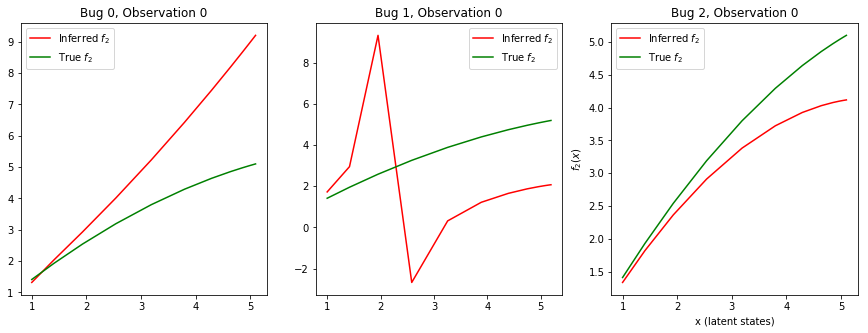

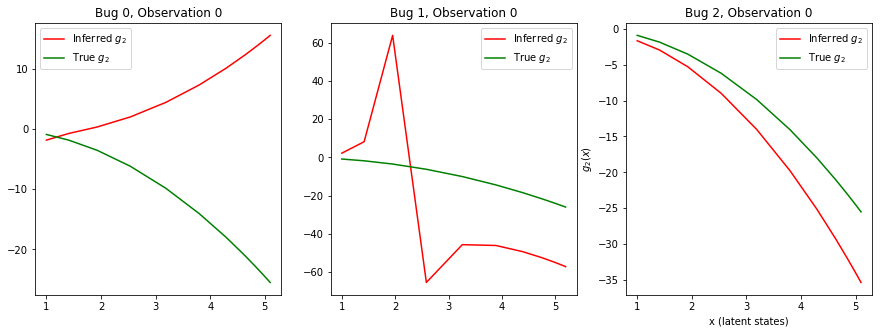

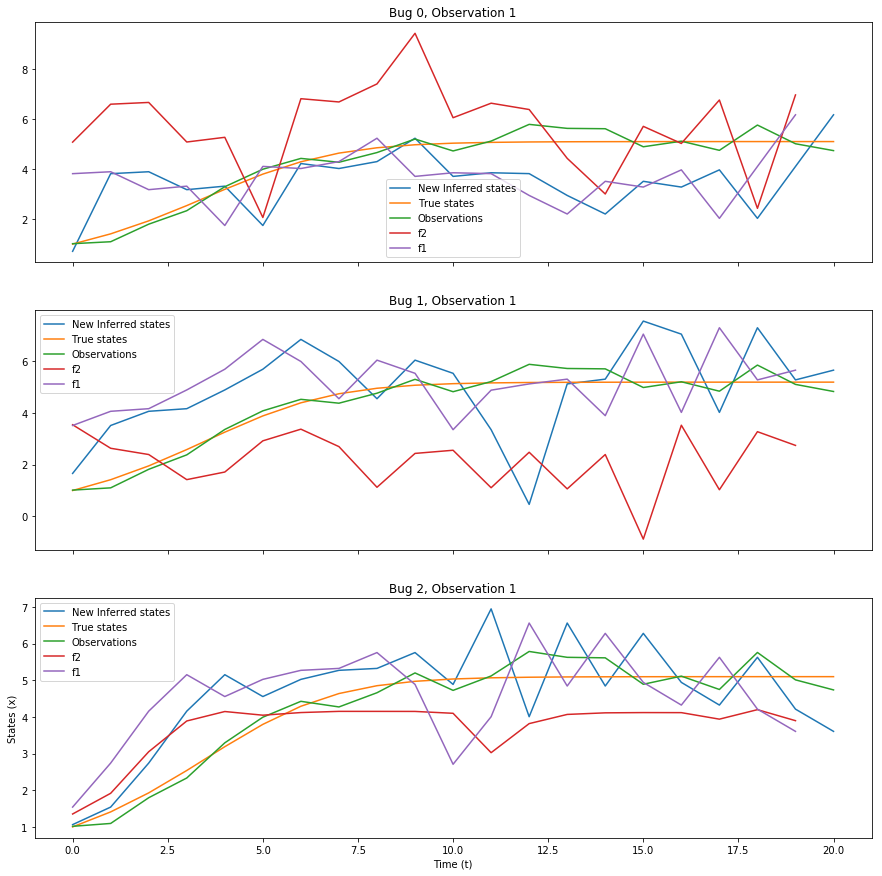

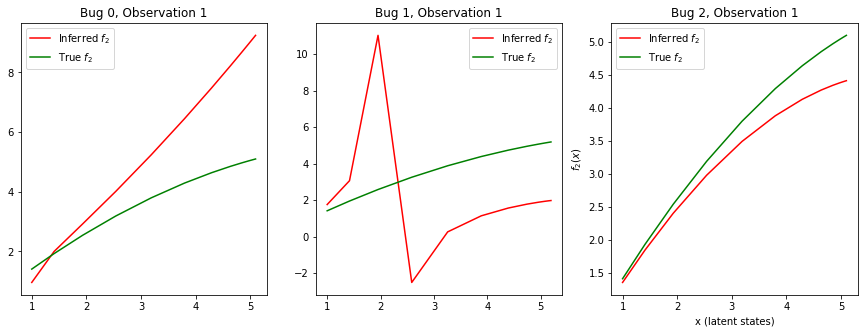

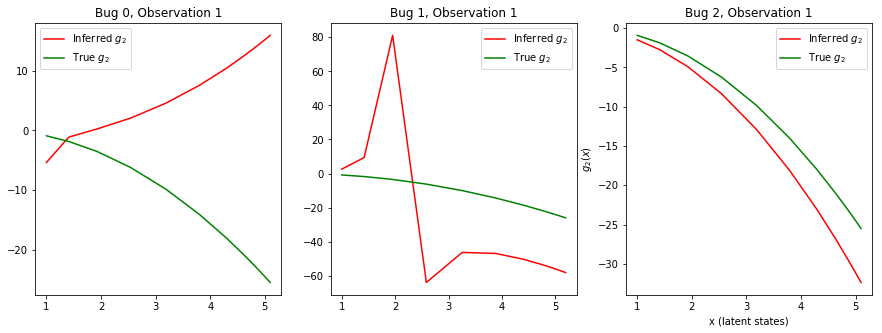

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


Step 10 Complete


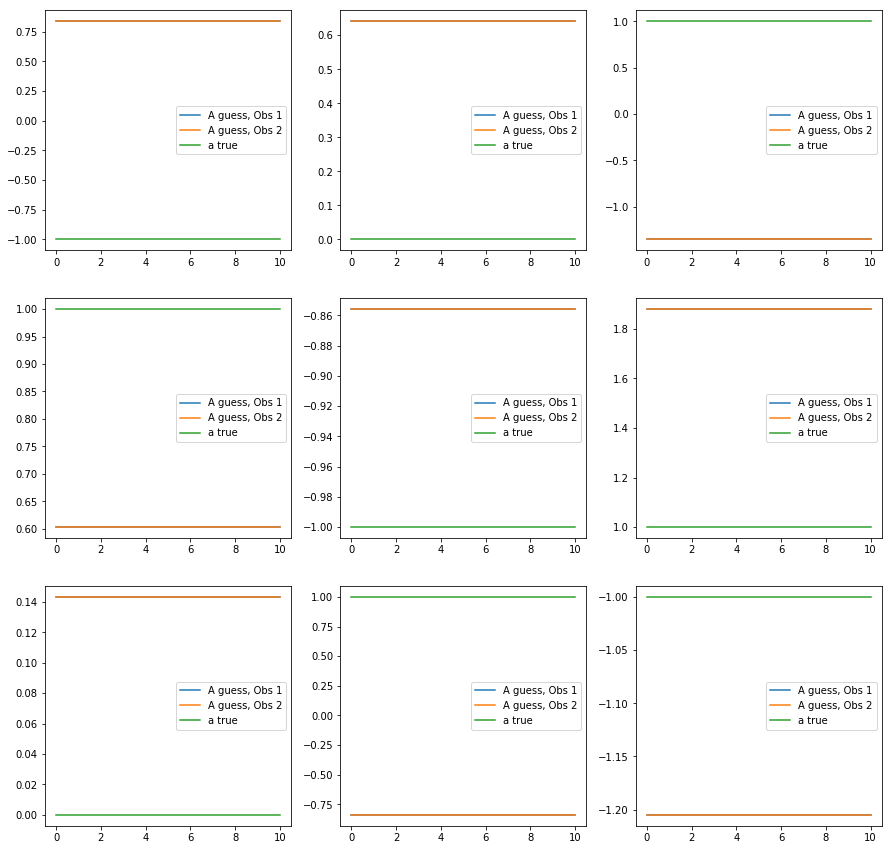

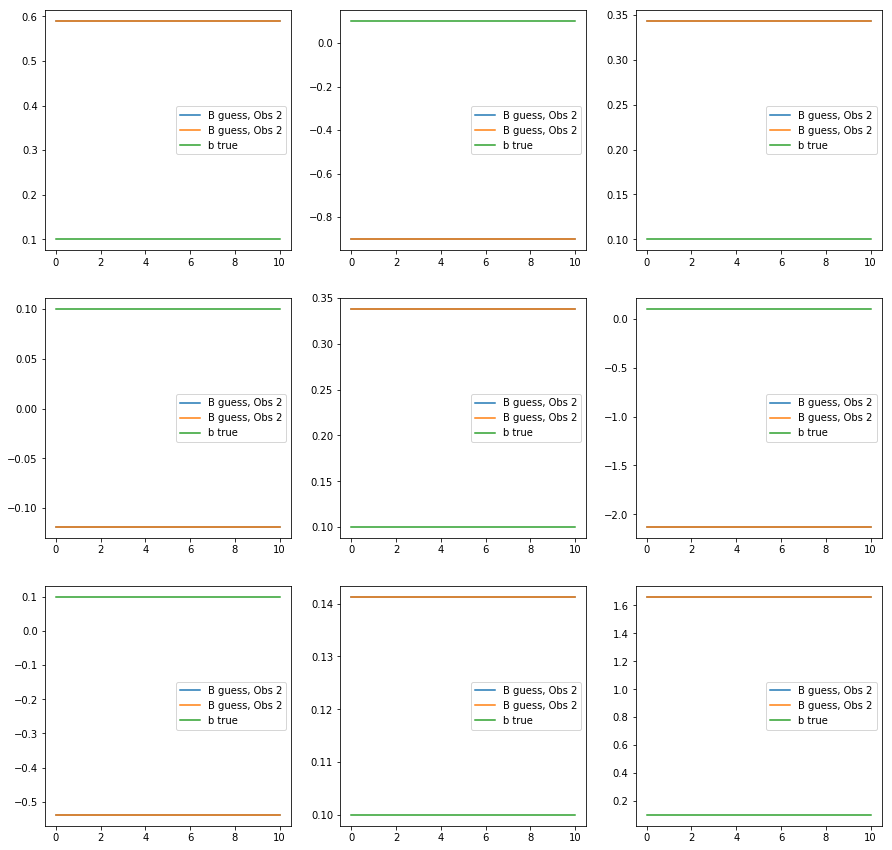

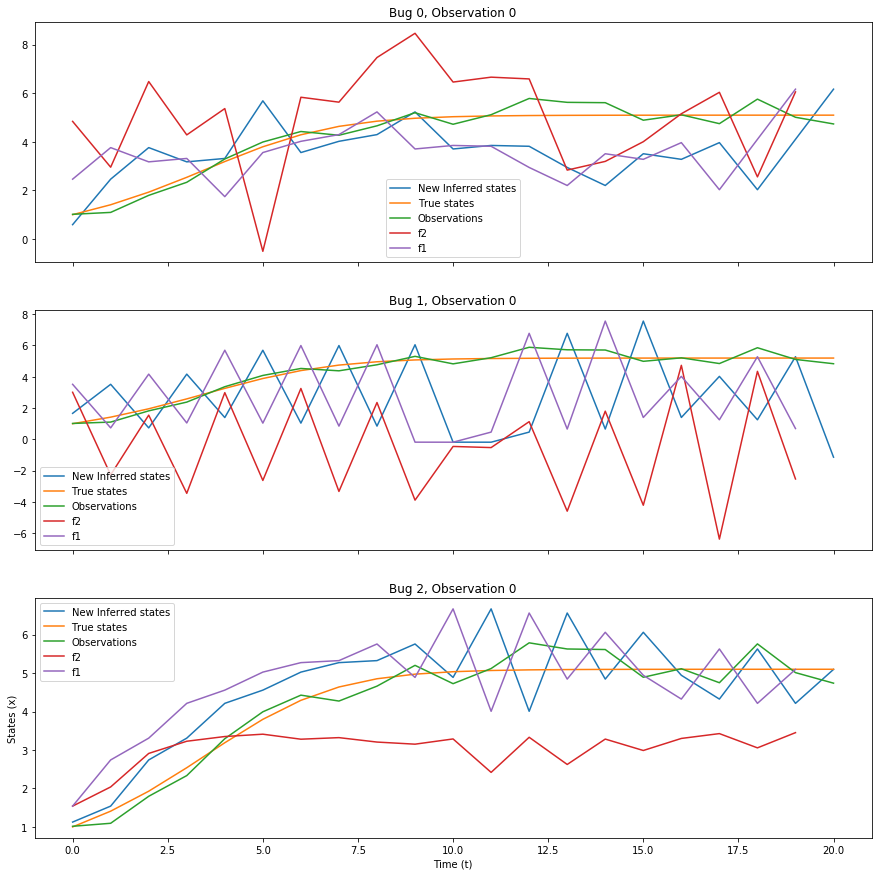

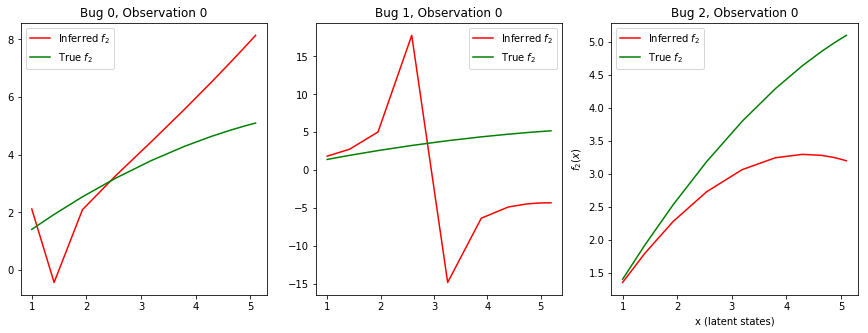

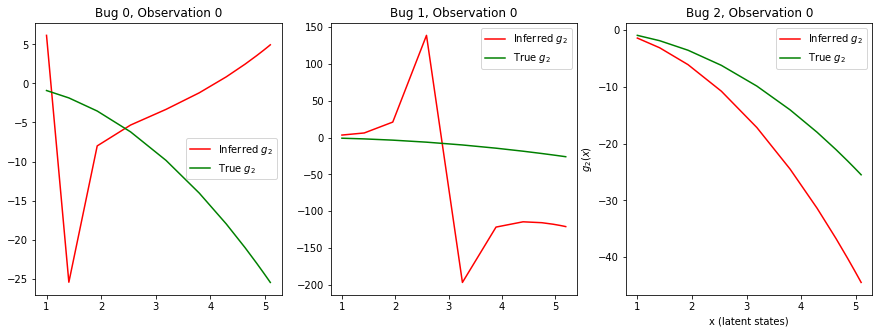

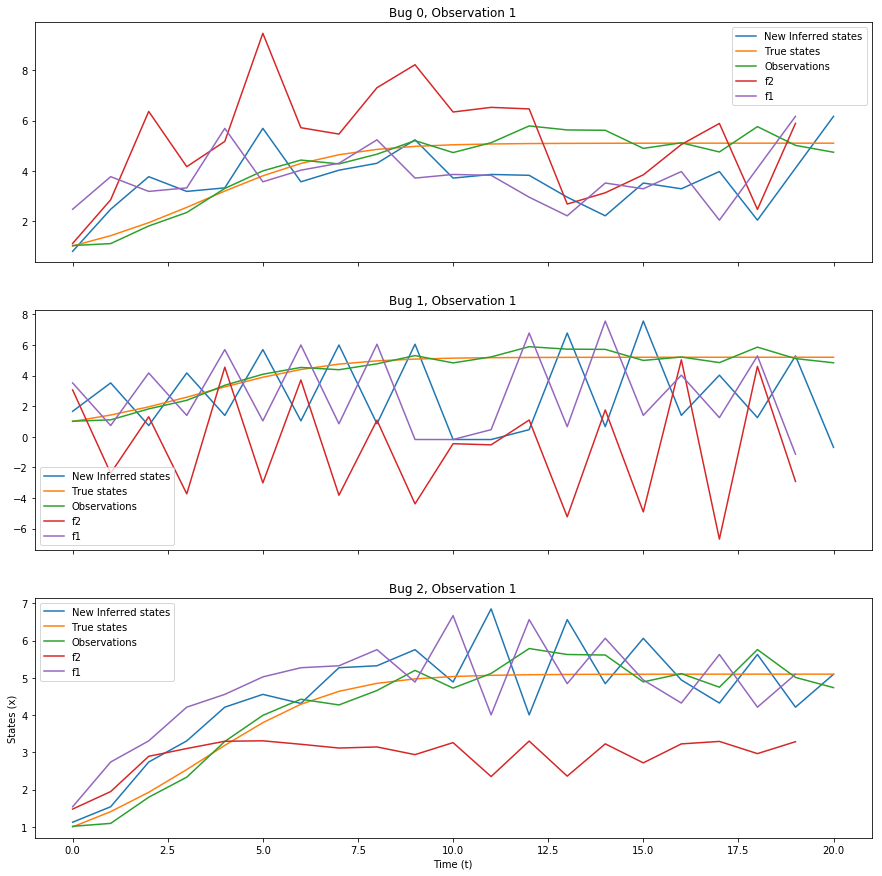

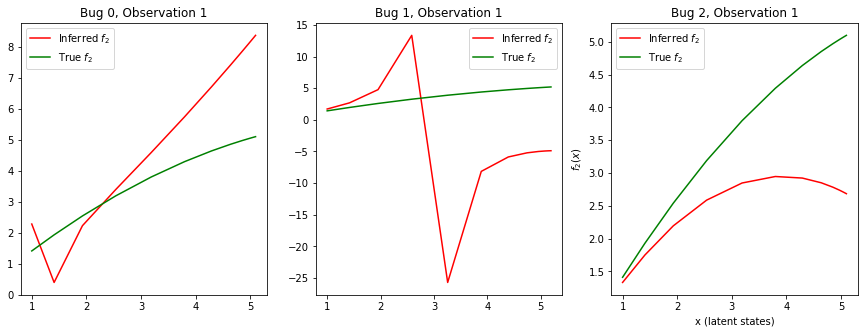

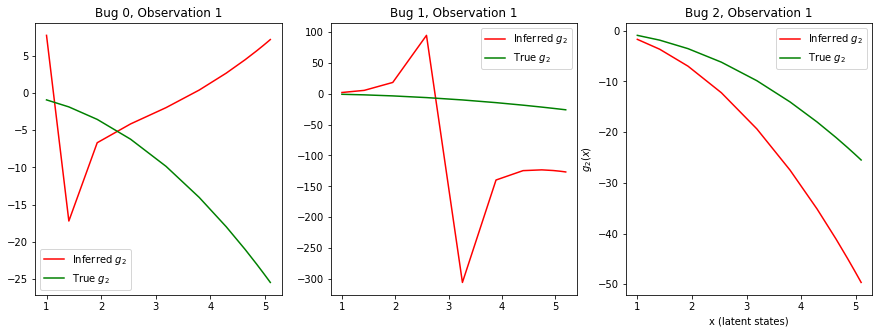

Step 20 Complete


/Users/jendawk/Dropbox (MIT)/Microbiome/POE_learner/spline_learner_poe4d_MM.py:277: RuntimeWarning: overflow encountered in exp
  prob_keep = np.exp(np.sum(num,0) - np.sum(dem,0))


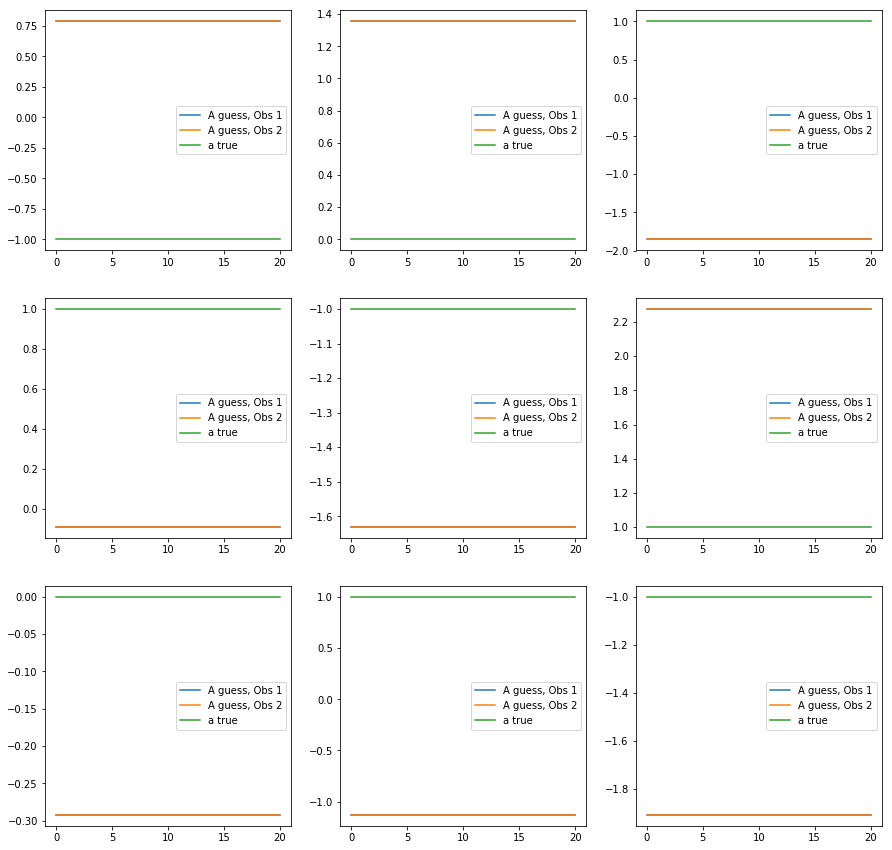

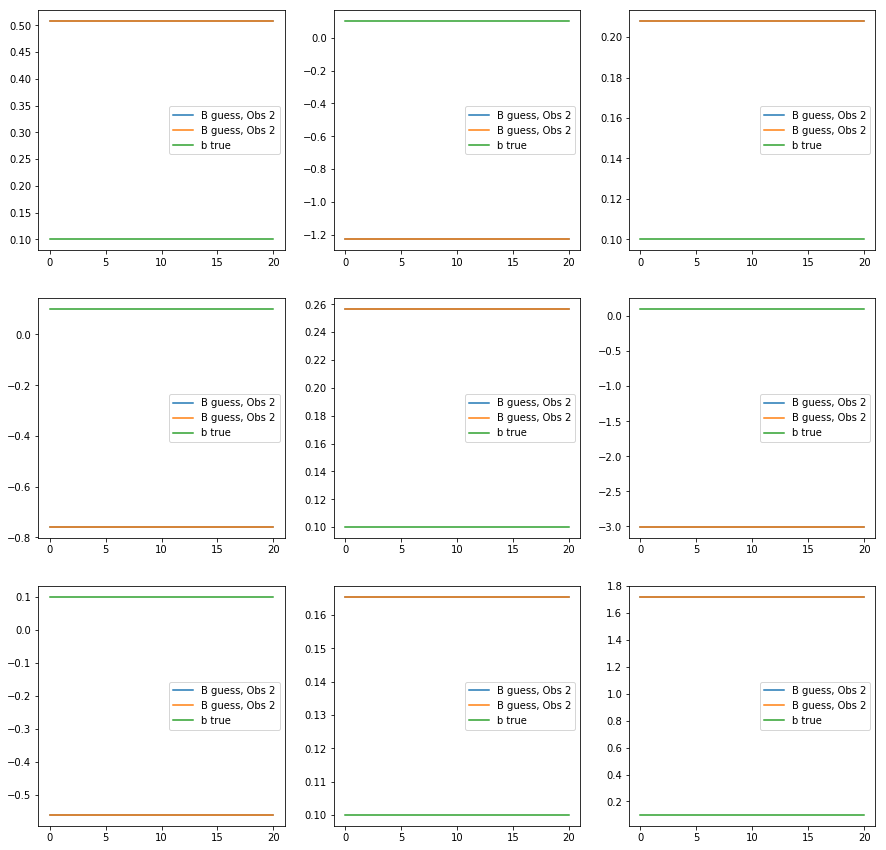

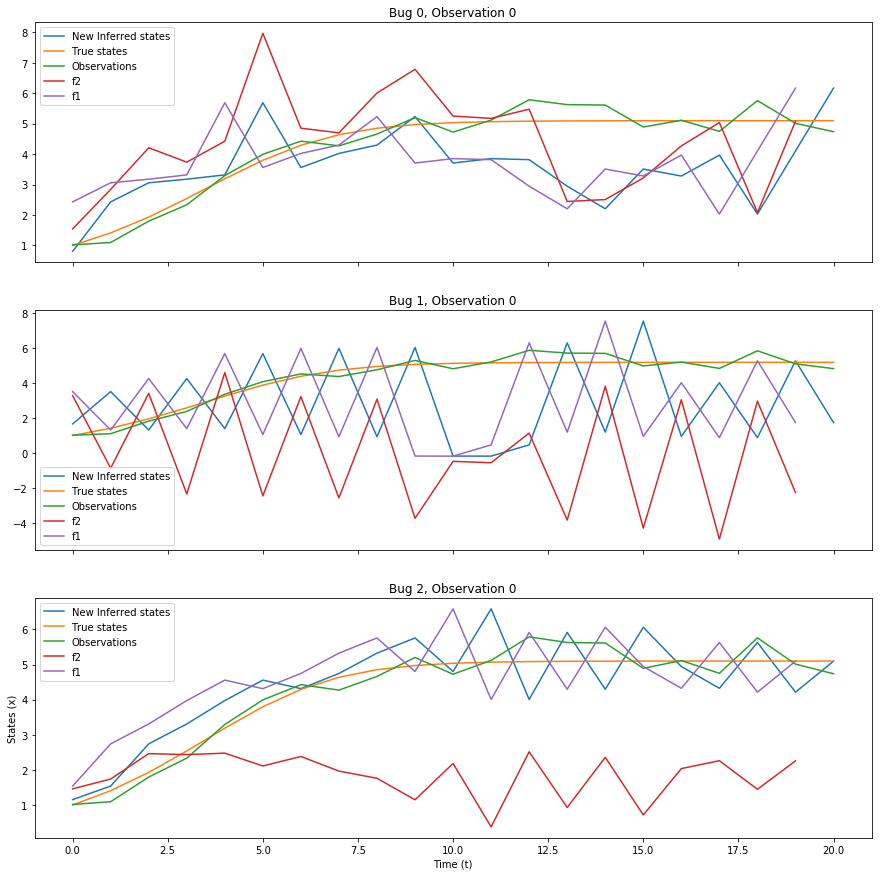

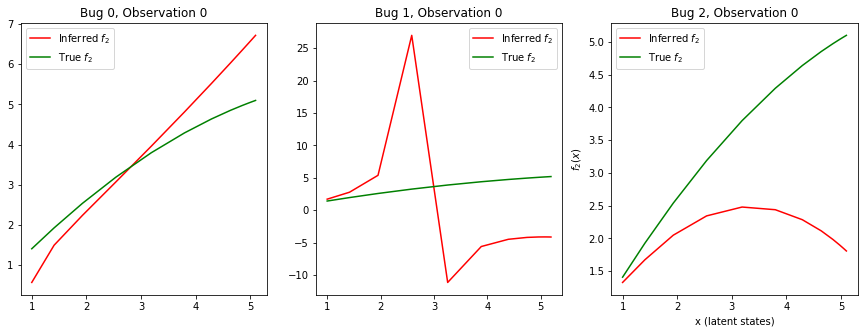

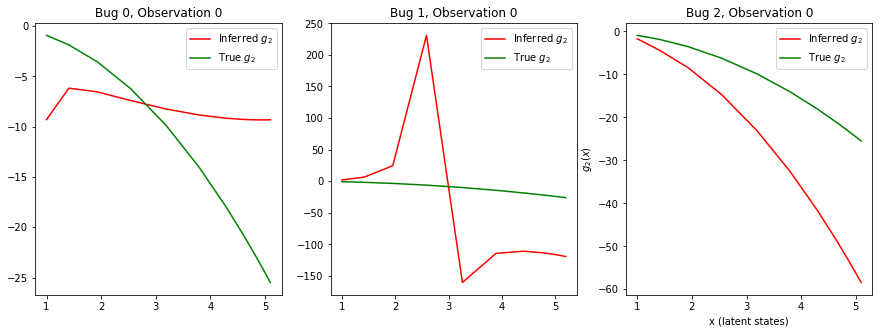

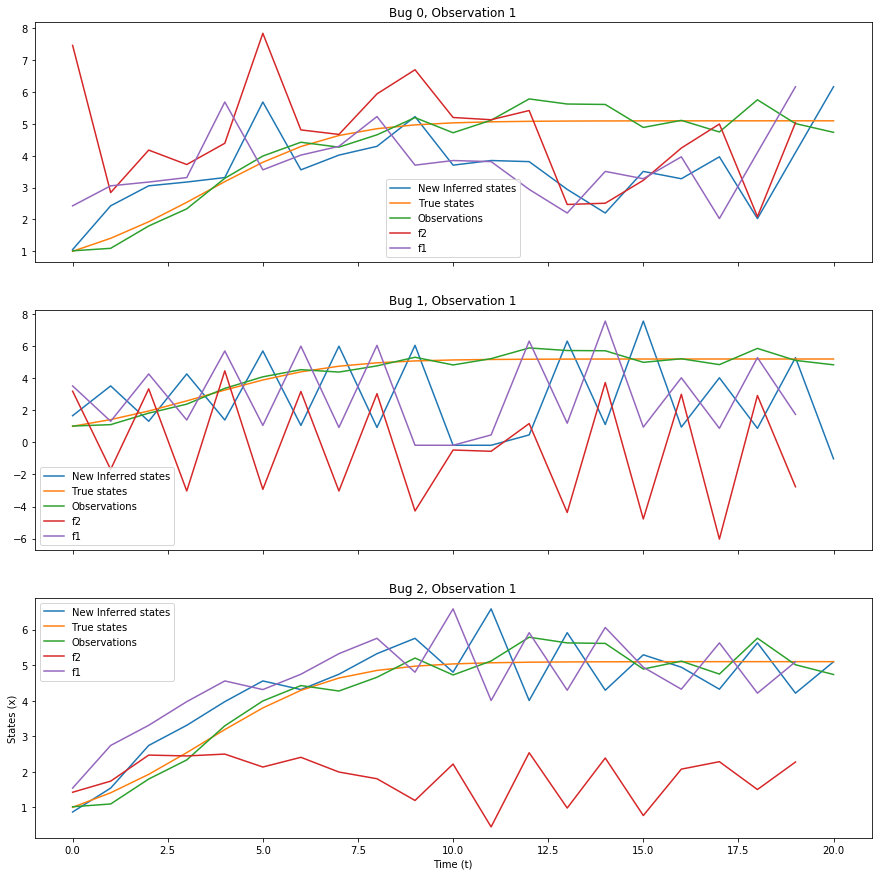

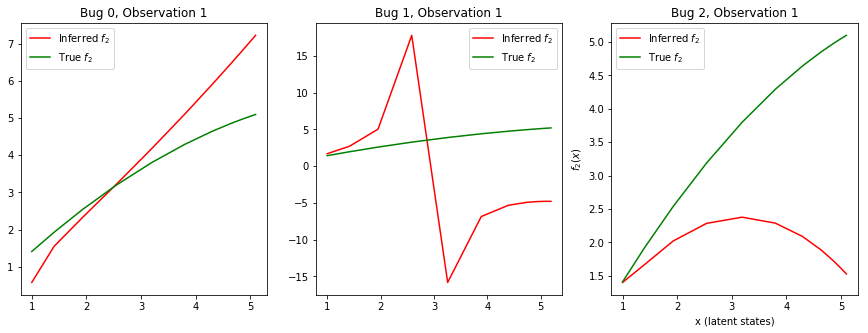

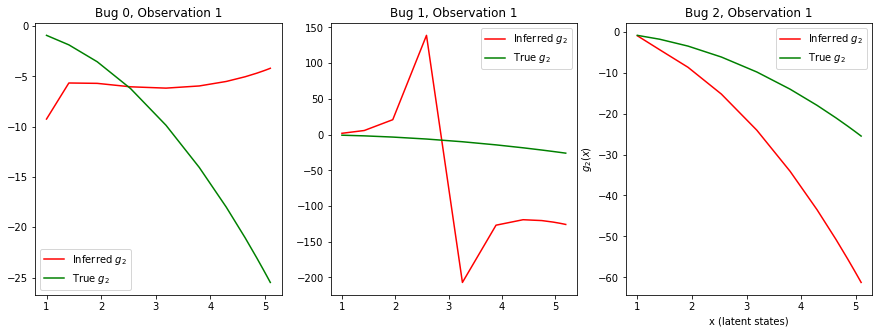

Step 30 Complete


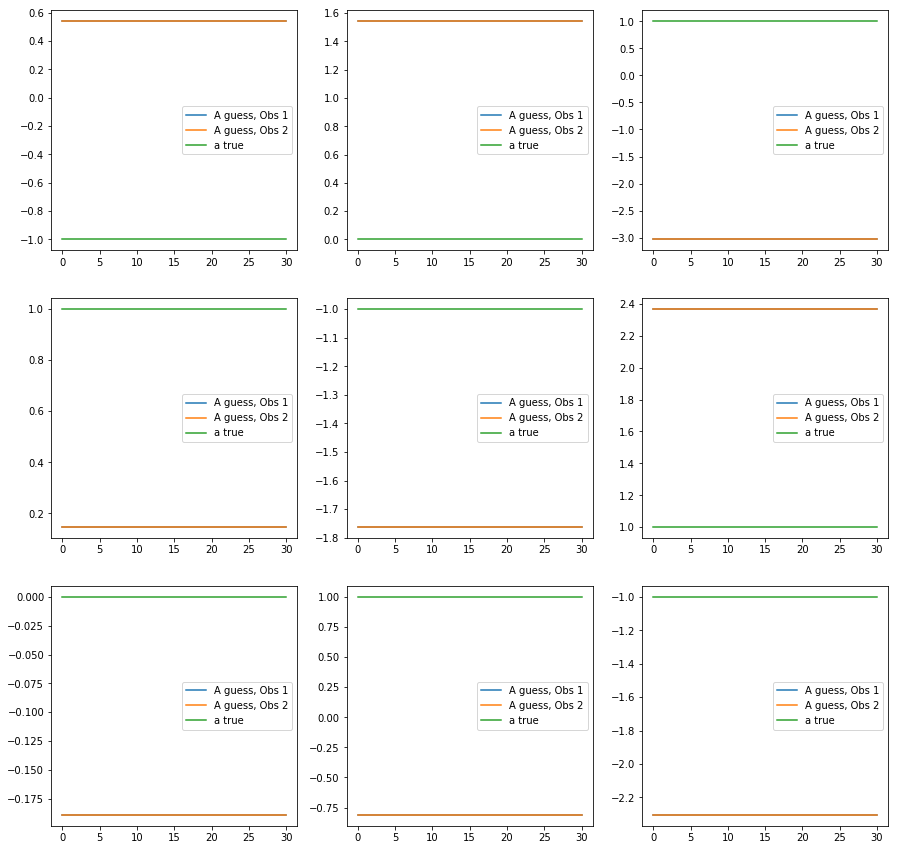

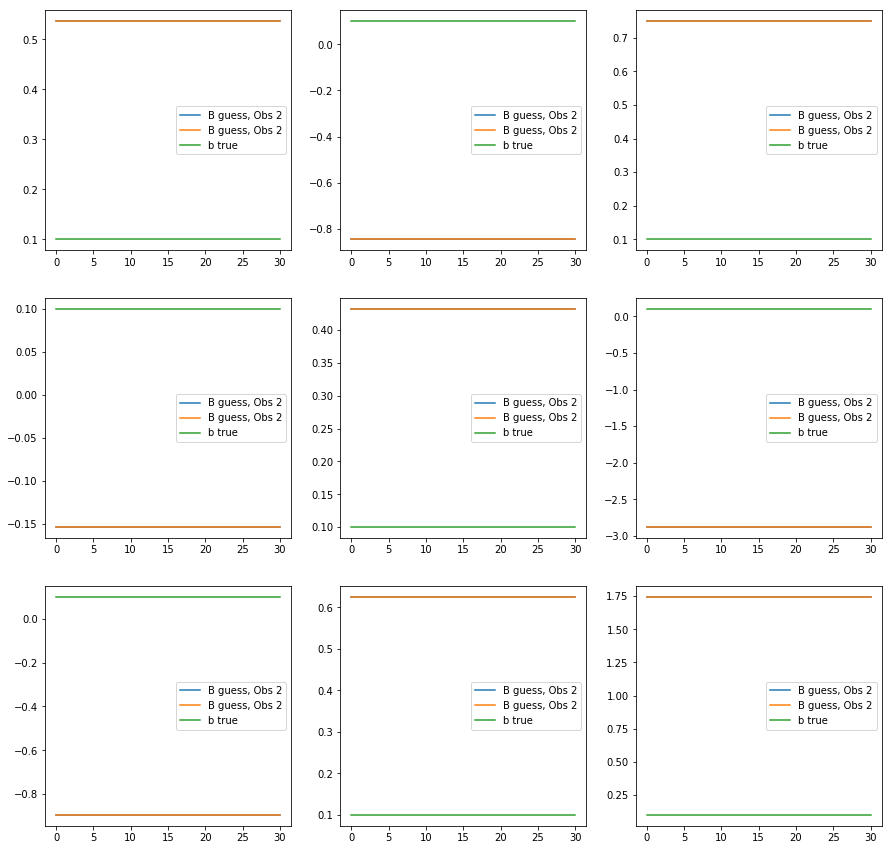

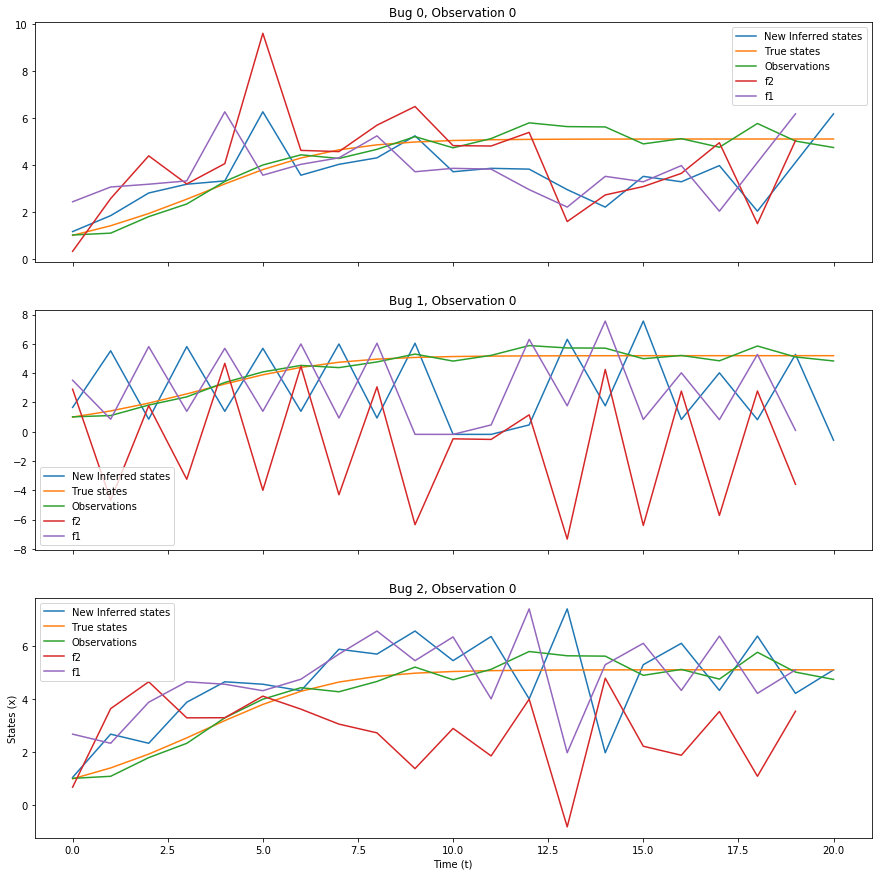

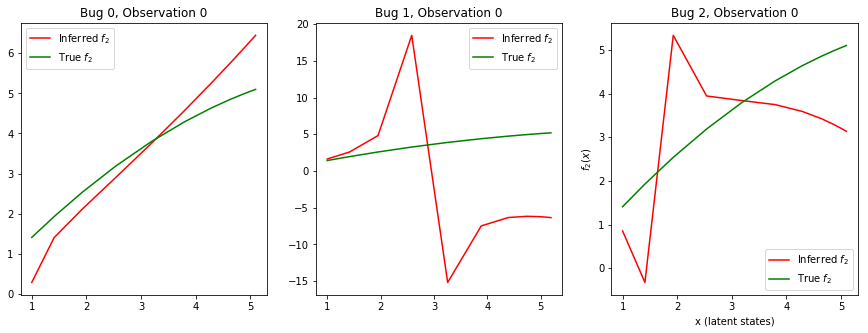

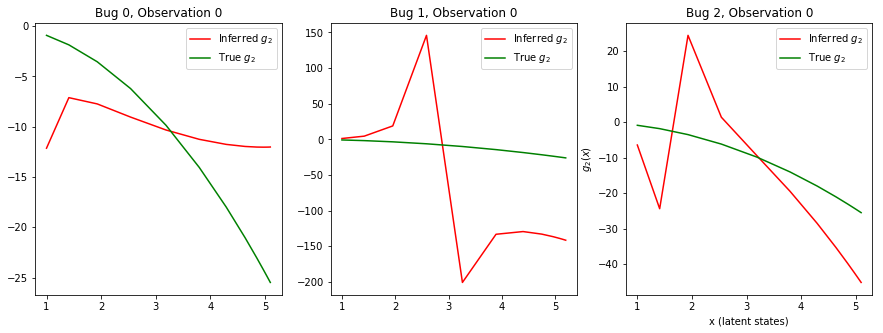

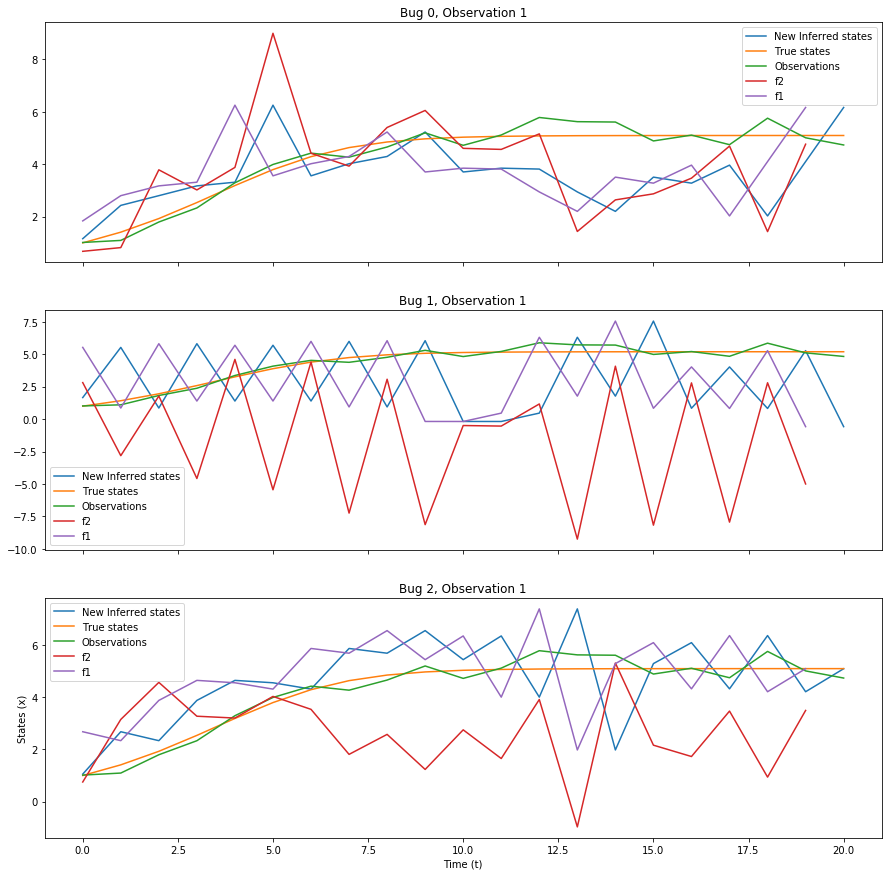

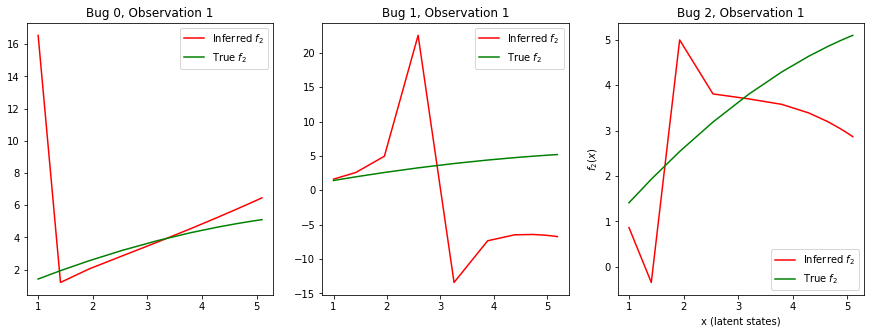

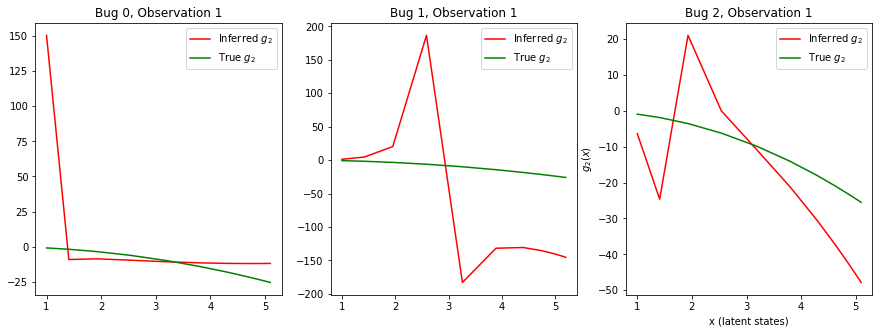

Step 40 Complete


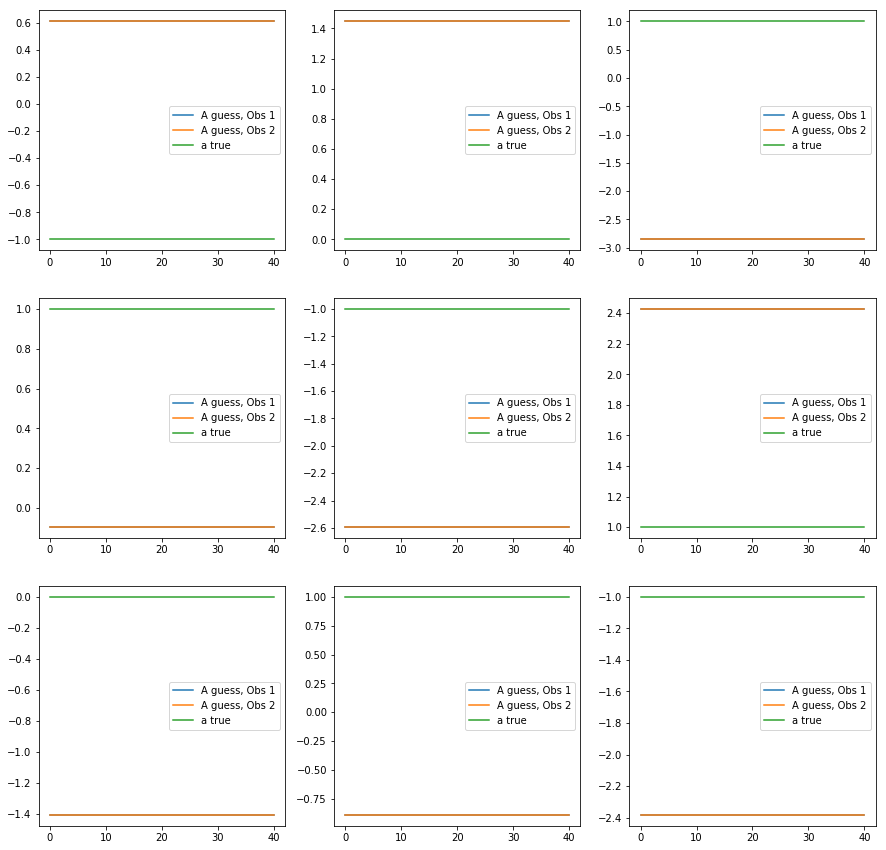

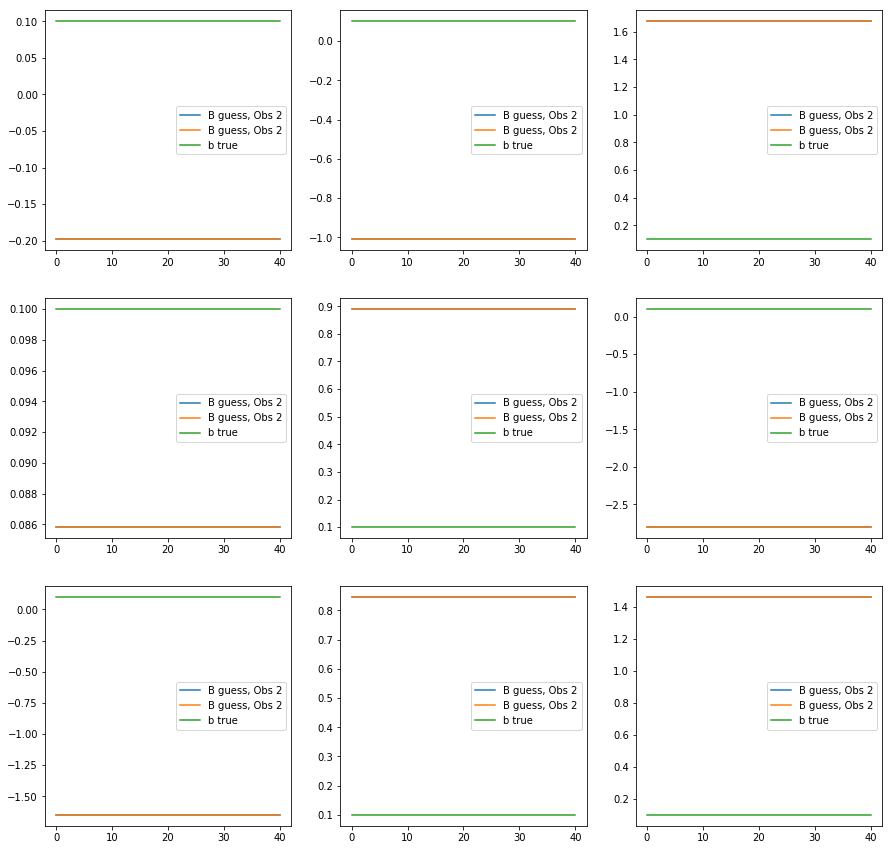

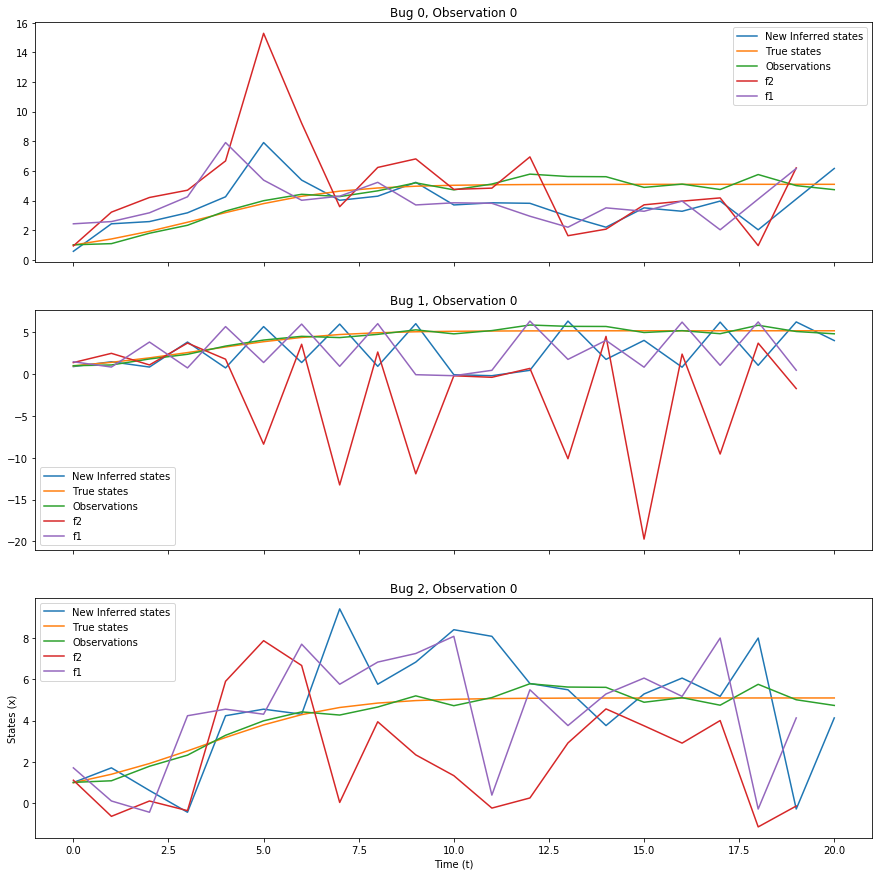

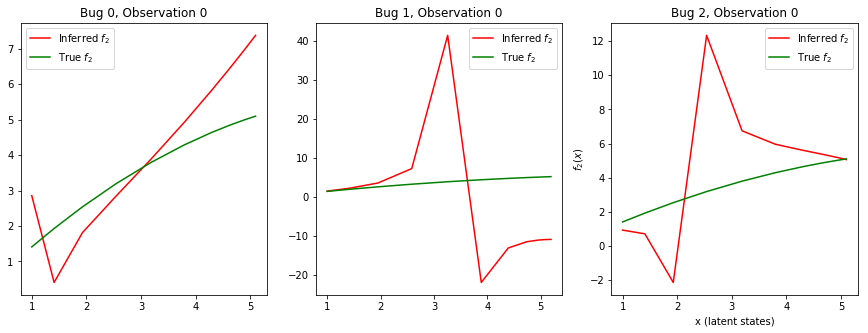

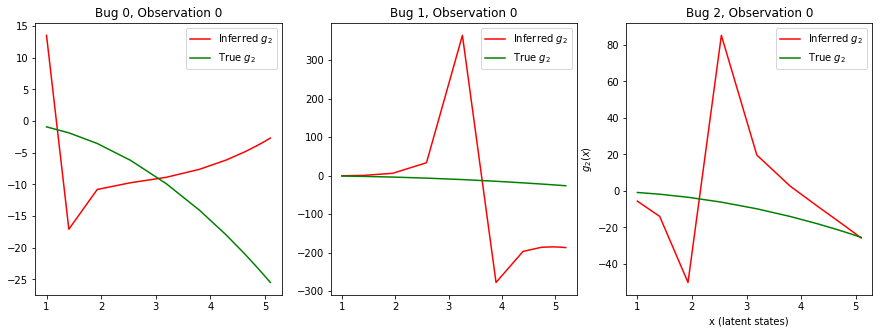

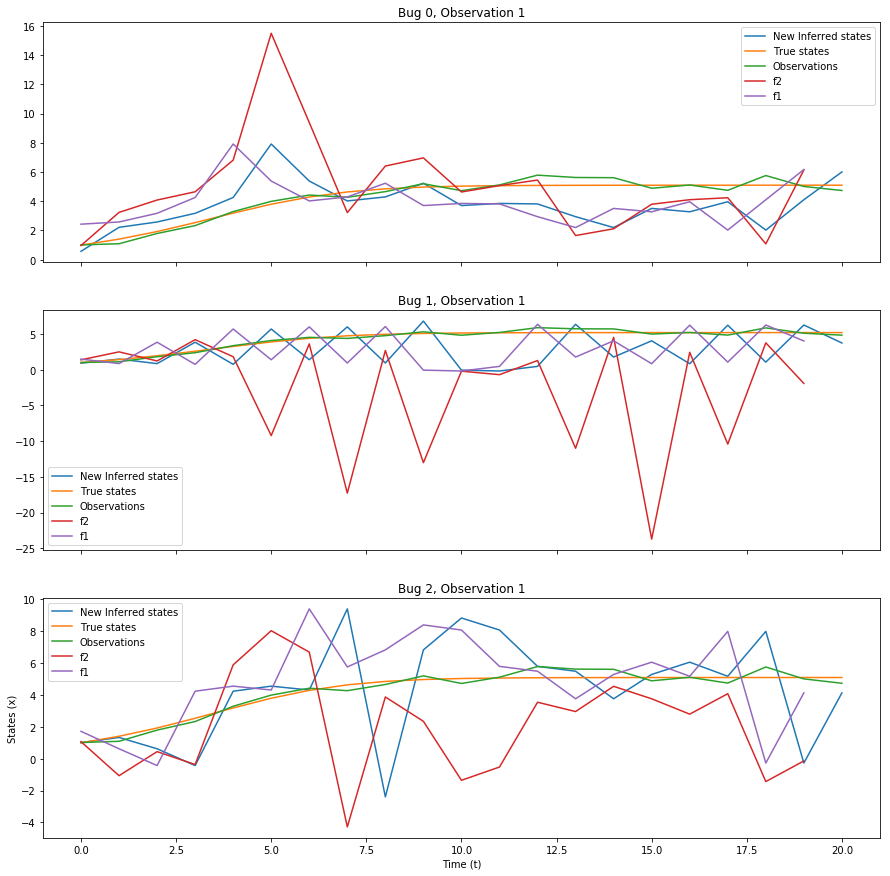

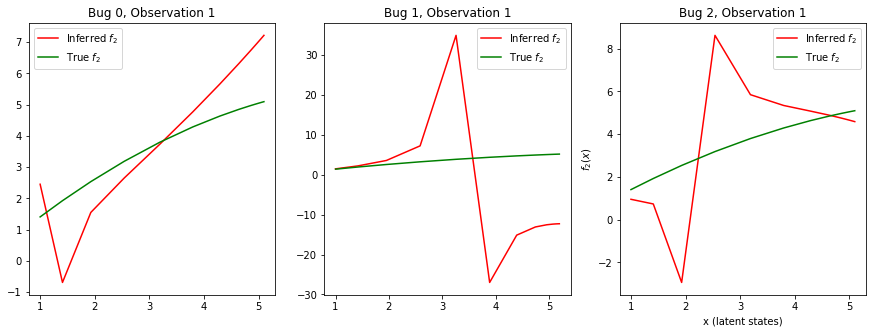

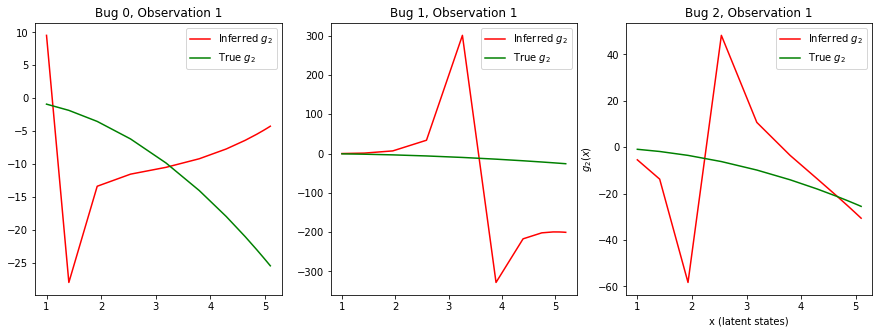

Step 50 Complete


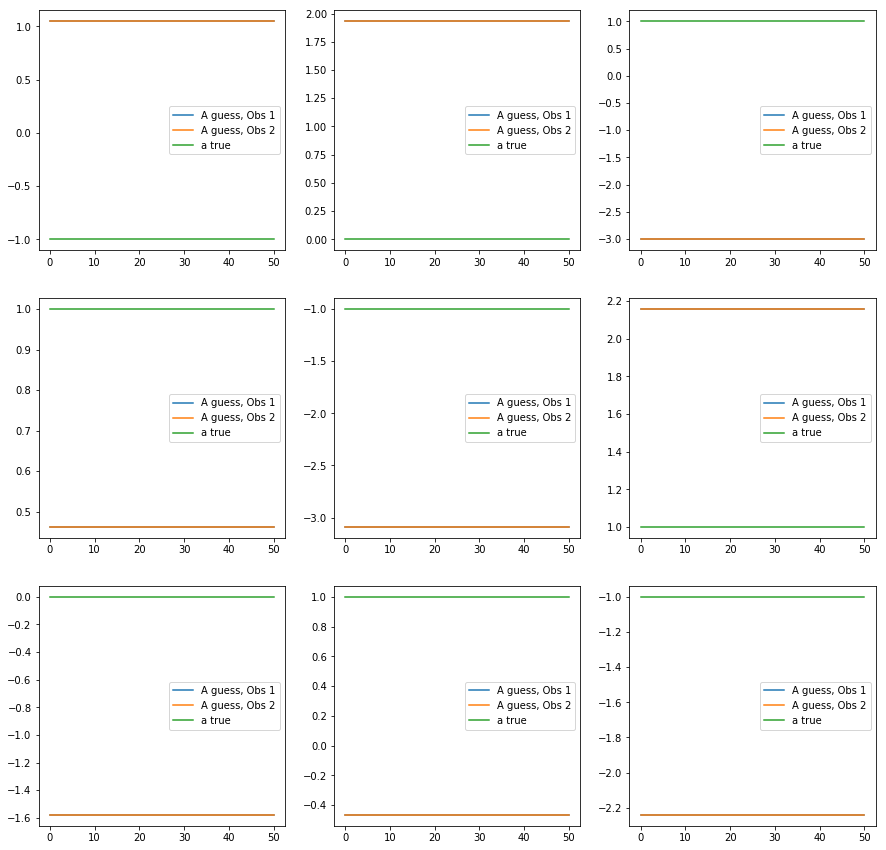

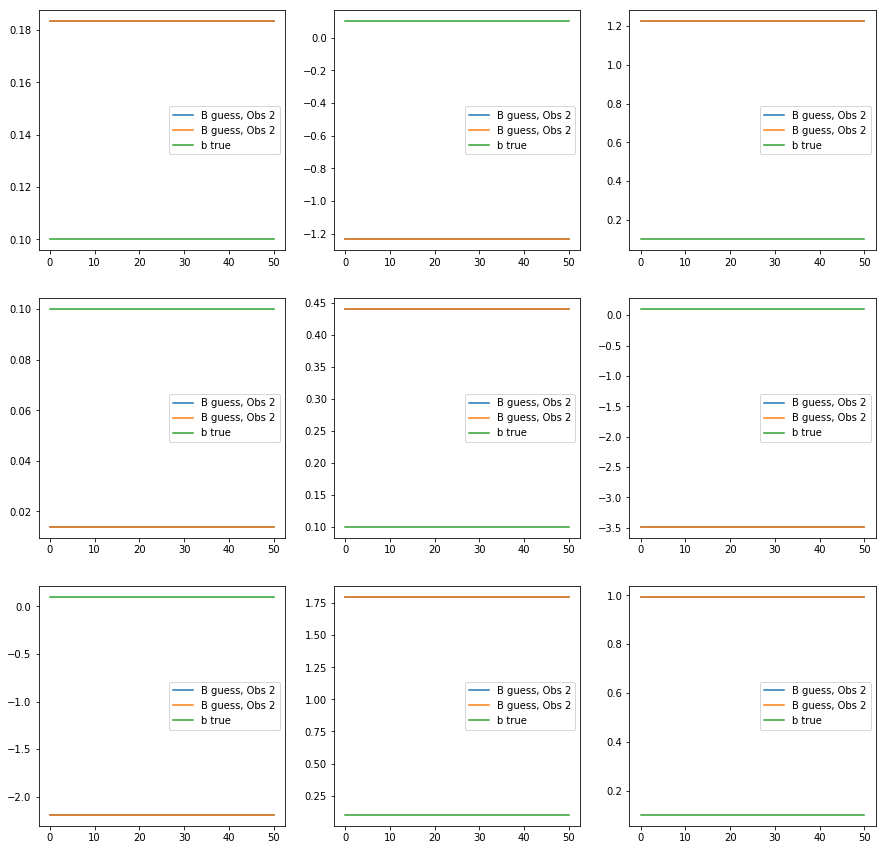

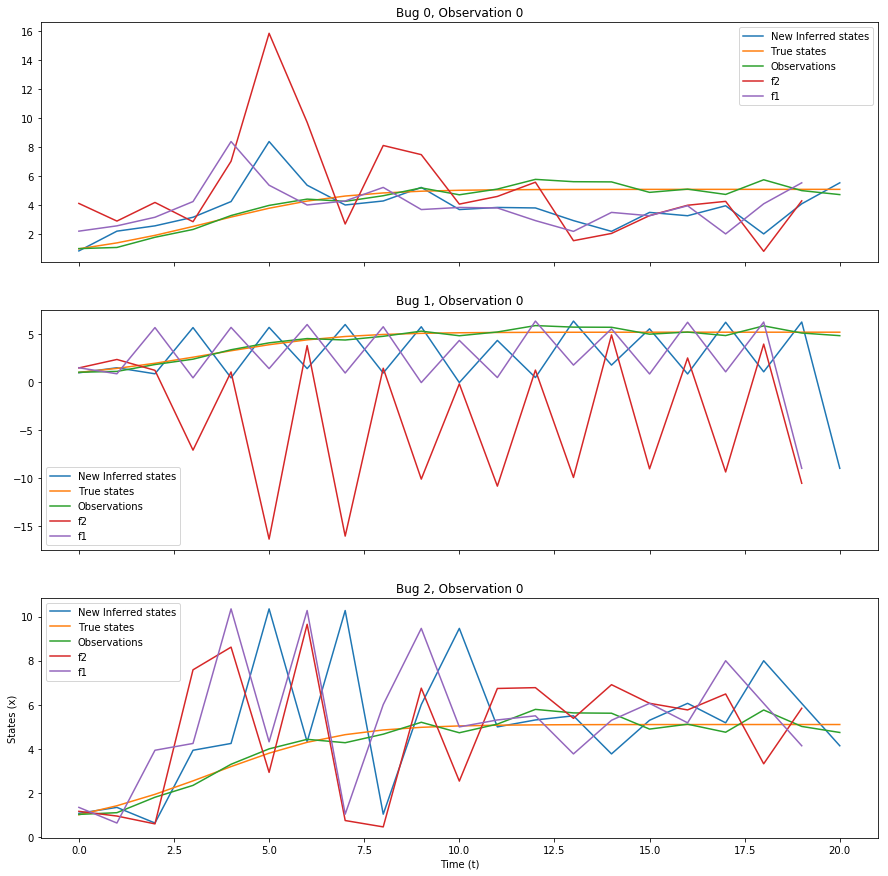

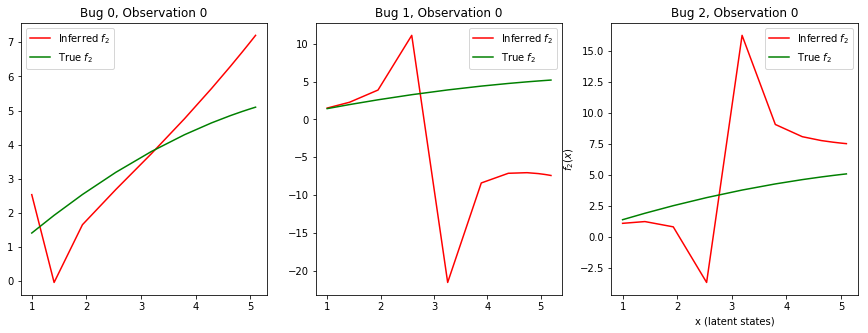

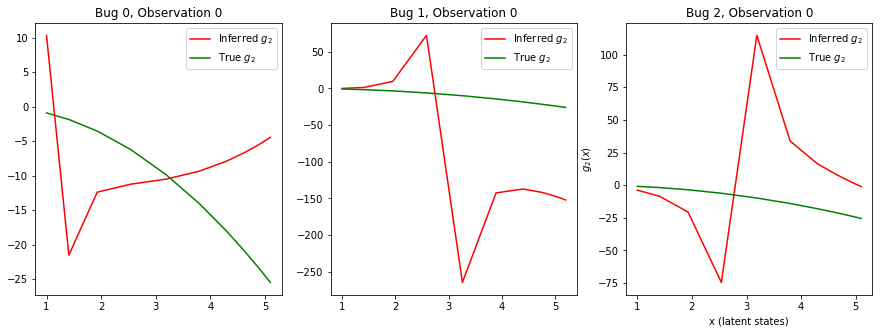

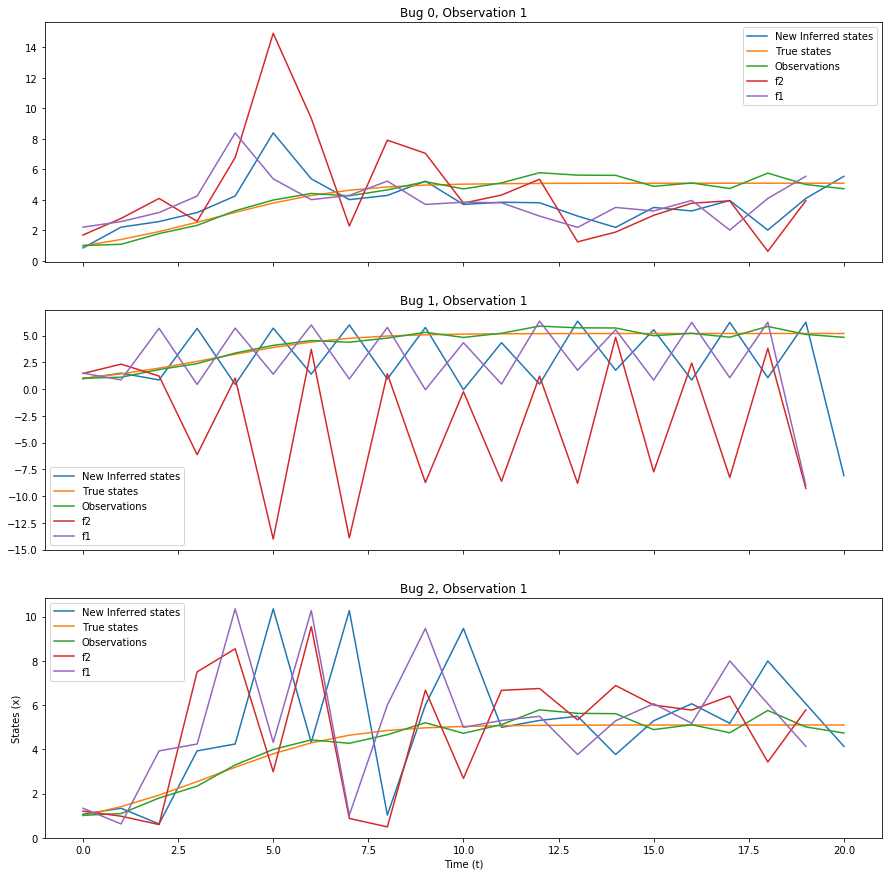

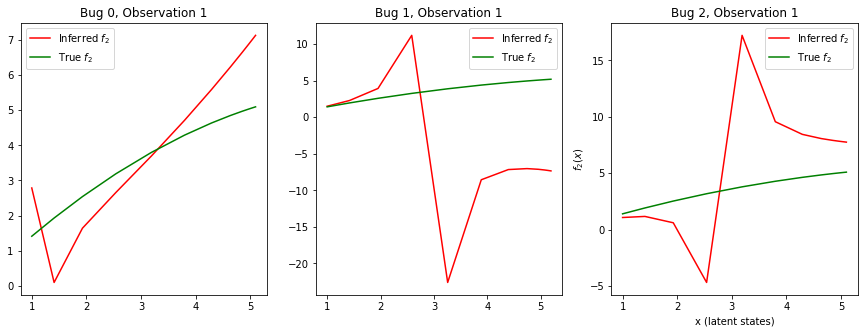

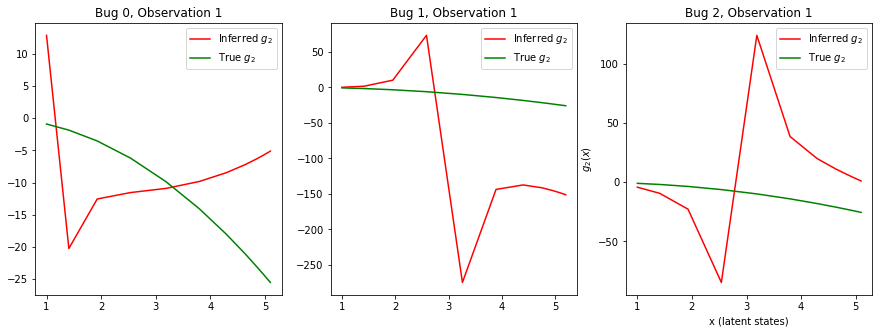

Step 60 Complete


In [ ]:
spl = SplineLearnerPOE_4D(use_mm = 1, bypass_f1 = True, TIME = 2, gr = 5, DT = .1, MEAS_VAR=.1, outdir = 'no_f1_mvar01_useMM_outdir')
spl.run(gibbs_steps = 1000)

In [ ]:
spl = SplineLearnerPOE_4D(use_mm = 1, TIME = 2, gr = 5, DT = .1, )
spl.run(gibbs_steps = 1000)

# Figures to generate for georg
show its working:
- inferring a and b over time
- actual trajectory vs inferred trajectory (x, f1, f2)

data generation figs:
- previously done just compile / make pretty



In [104]:
xin.shape

(20, 3)

In [109]:
xin = spl.states[:-1,:,0]
xout = spl.states[1:,:,0]

muA = np.zeros((3,3))

g1_a = (xout - xin - xin*spl.gr[0]*spl.dt)/(spl.dt*xin)
xbig = [xin for i in range(spl.num_bugs)]
X = diag_mat(xbig)

g1_aa = g1_a.flatten(order = 'F')

sig_new = np.linalg.inv((spl.dt**2)*X.T@np.linalg.inv(spl.poe_var)@X +
                                    np.linalg.inv(spl.avar*np.eye(spl.num_bugs**2)))

mu_new = (X.T@np.linalg.inv(spl.poe_var)@g1_aa)@sig_new

g2true=X@spl.true_a.T.flatten(order='F')
g2true=xin@spl.true_a.T

a_guess = (xin.T@np.linalg.inv(spl.poe_var[:20,:20])@g2true + muA*(1/spl.avar))@sig_new[:3,:3].T

# a_guess = np.linalg.lstsq(X, g2true,rcond=None)[0]

a_guess = np.reshape(a_guess,(3,3),order='F').T
print(a_guess)
print(spl.true_a)

[[-54.40387977 -69.78001829 -56.51870685]
 [ 75.07451128  94.74999725  77.67855249]
 [-12.52294729 -13.80996348 -12.54516068]]
[[-1  0  1]
 [ 1 -1  1]
 [ 0  1 -1]]


In [113]:
xin.T@(xin@spl.true_a.T)

array([[0.08798597, 1.59067638, 0.5375788 ],
       [0.1202852 , 2.03411038, 0.71970957],
       [0.09304709, 1.65142424, 0.56481691]])

In [69]:
xin.T@(xin@spl.true_a.T)

array([[7.09831627, 7.09831627, 7.09831627],
       [9.2217398 , 9.2217398 , 9.2217398 ],
       [7.39963453, 7.39963453, 7.39963453]])

In [46]:
g1 = xin@spl.true_a.T
g2 = (xout - xin - xin*spl.gr[0]*spl.dt)/(spl.dt*xin)
# out2 = xout@spl.true_a

g3 = np.reshape((X@spl.true_a.T.flatten(order='F')),xin.shape,order='F')

f2 = xin + xin*spl.gr[0]*spl.dt + xin*(xin@spl.true_a.T)*spl.dt

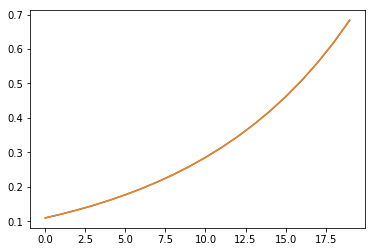

In [32]:
plt.plot(f2[:,0])
plt.plot(xout[:,0])

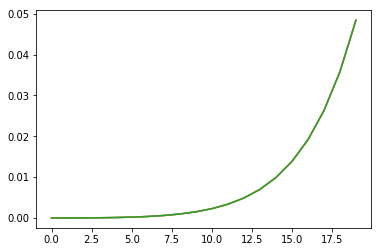

In [47]:
plt.plot(g1[:,0])
plt.plot(g2[:,0])
plt.plot(g3[:,0])

[[-0.01  0.    0.01]
 [ 0.01 -0.01  0.01]
 [ 0.    0.01 -0.01]]
(3, 3, 20)
[[-0.01  0.    0.01]
 [ 0.01 -0.01  0.01]
 [ 0.    0.01 -0.01]]


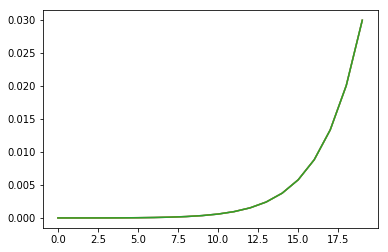

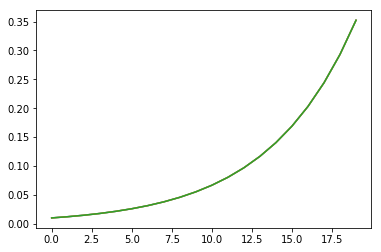

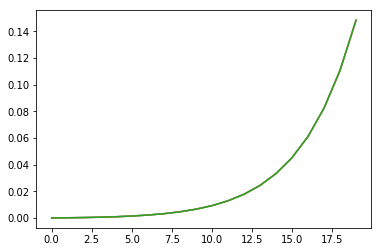

In [13]:
xin = spl.states[:-1,:,0]
xout = spl.states[1:,:,0]

out = (xout - xin - spl.dt*xin*spl.gr[0])/spl.dt

a = spl.true_a
x = xin
b = spl.true_b
ii = 0
out2 = np.array([[(a[i, j]*x[:, i]*x[:, j]*b[i, j])/(b[i, j] + ii*x[:, i]) \
                  for j in range(a.shape[0])] for i in range(a.shape[0])])
print(out2[:,:,0])
print(out2.shape)
for k in range(out2.shape[-1]):
    np.fill_diagonal(out2[:, :, k], np.array(
        [a[i, i]*(x[k, i]**2) for i in range(a.shape[0])]))
print(out2[:,:,0])
out2 = np.sum(out2,1).T
# out2 = michaelis_menten(xin,a,b,0)
X = diag_mat([xin for i in range(3)])
out3 = xin*np.reshape((X@spl.true_a.T.flatten(order='F')),xin.shape,order='F')
for i in range(3):
    plt.plot(out2[:,i])
    plt.plot(out3[:,i])
    plt.plot(out[:,i])
    plt.show()

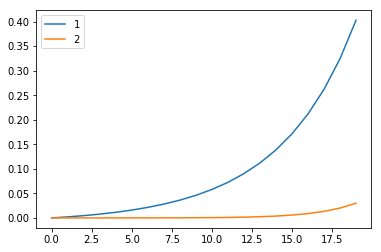

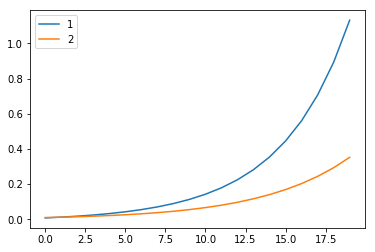

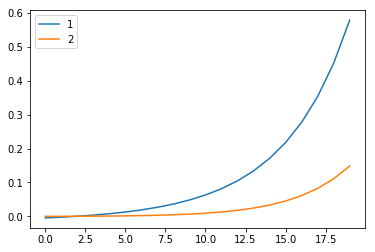

In [2]:
xin = spl.states[:-1,:,0]
out = michaelis_menten(xin,spl.true_a, spl.true_b,0)
X = diag_mat([xin for i in range(3)])
out2 = xin*np.reshape((X@spl.true_a.T.flatten(order='F')),xin.shape,order='F')
for i in range(3):
    plt.plot(out[:,i],label='1')
    plt.plot(out2[:,i],label='2')
    plt.legend()
    plt.show()

In [1]:
xin.shape

NameError: name 'xin' is not defined

NameError: name 'xin' is not defined

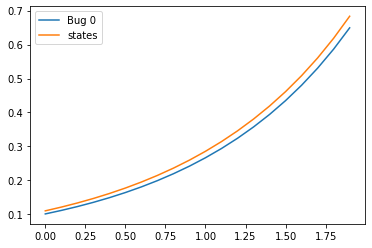

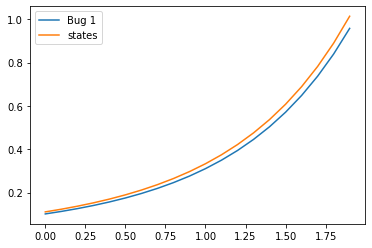

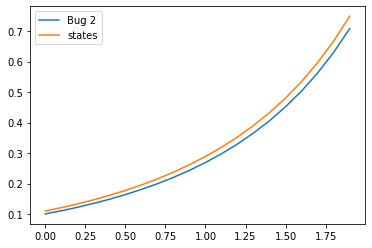

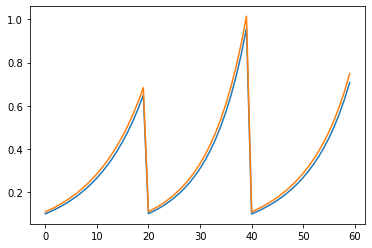

In [21]:
spl = SplineLearnerPOE_4D(use_mm =0)

tvec = np.arange(0,spl.time,spl.dt)
xin = spl.states[:-1,:,0]
out = xin + xin*.1*spl.dt + spl.dt*michaelis_menten(xin,spl.true_a, spl.true_b,1)
for i in range(3):
    plt.plot(tvec,out[:,i], label = 'Bug ' + str(i))
    plt.plot(tvec,spl.states[1:,i,0],label = 'states')
    plt.legend()
    plt.show()

plt.plot(out.flatten(order='F'))
plt.plot(spl.states[1:,:,0].flatten(order='F'))

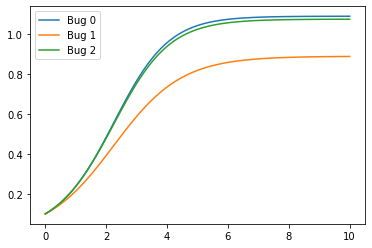

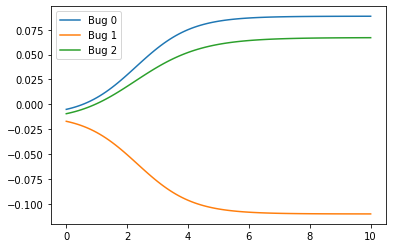

In [5]:
spl = SplineLearnerPOE_4D(use_mm =1)
# for i in range(3):
#     xout = spl.states[1:,i,0]
#     xin = spl.states[:-1,i,0]
#     g0 = (xout - xin - spl.dt*xin*spl.gr[0])/spl.dt
#     plt.plot(g0,label = 'Bug ' + str(i))
# plt.legend()    
# plt.show()
tvec = np.arange(0,spl.time+spl.dt,spl.dt)
for i in range(3):
#     xout = spl.states[1:,i,0]
#     xin = spl.states[:-1,i,0]
#     g0 = (xout - xin - spl.dt*xin*spl.gr[0])/spl.dt
    plt.plot(tvec,spl.states[:,i,0],label = 'Bug ' + str(i))
plt.legend()    
plt.show()

plt.figure()

# out=[np.expand_dims(spl.states[0,:,0],0)]
# for x in spl.states[:,i,0]:
#     out.append(michaelis_menten(out[-1],spl.true_a, np.ones(spl.true_b.shape),0))

# outmat = np.concatenate(out)
xin = spl.states[:,:,0]
out = michaelis_menten(xin,spl.true_a, spl.true_b,1)
for i in range(3):
    plt.plot(tvec,out[:,i], label = 'Bug ' + str(i))
plt.legend()

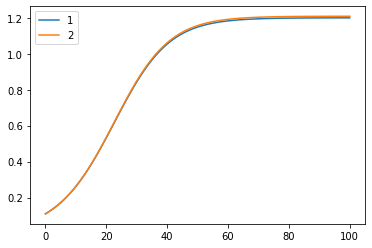

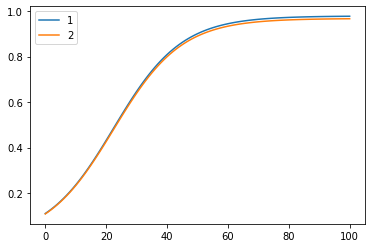

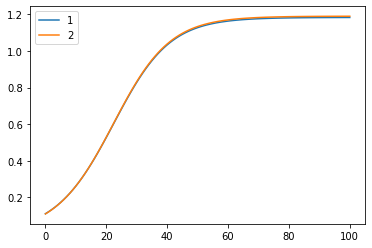

In [6]:
for i in range(3):
    xo1 = xin[:,i] + spl.dt*spl.gr[0]*xin[:,i]
    xo2 = xin[:,i] + spl.dt*spl.gr[0]*xin[:,i] + out[:,i]*spl.dt
    plt.plot(xo1,label='1')
    plt.plot(xo2,label='2')
    plt.legend()
    plt.show()

In [13]:
atest = np.array([[1,2,3],[4,5,6],[7,8,9]])
xdat = np.random.rand(10,3)
aflat = np.reshape(atest,(1,9),order = 'C')
print(aflat)
# print(diag_mat([xdat for i in range(3)]))
print(aflat@diag_mat([xdat for i in range(3)]).T)

aflat2 = np.reshape(atest,(9,1),order = 'C')
print(aflat2)
# print(diag_mat([xdat for i in range(3)]))
print(diag_mat([xdat for i in range(3)])@aflat2)

[[1 2 3 4 5 6 7 8 9]]
[[ 5.40715254  3.93553427  3.35191997  2.33352171  1.31952985  2.97525146
   3.29491898  1.59339335  3.11744338  4.27121859 13.23336169 10.33264254
   7.97816249  5.01766538  2.83161023  6.60756828  7.55287714  3.69604817
   8.869733    9.51533433 21.05957085 16.7297508  12.60440501  7.70180906
   4.34369062 10.2398851  11.81083529  5.798703   14.62202262 14.75945008]]
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[[ 5.40715254]
 [ 3.93553427]
 [ 3.35191997]
 [ 2.33352171]
 [ 1.31952985]
 [ 2.97525146]
 [ 3.29491898]
 [ 1.59339335]
 [ 3.11744338]
 [ 4.27121859]
 [13.23336169]
 [10.33264254]
 [ 7.97816249]
 [ 5.01766538]
 [ 2.83161023]
 [ 6.60756828]
 [ 7.55287714]
 [ 3.69604817]
 [ 8.869733  ]
 [ 9.51533433]
 [21.05957085]
 [16.7297508 ]
 [12.60440501]
 [ 7.70180906]
 [ 4.34369062]
 [10.2398851 ]
 [11.81083529]
 [ 5.798703  ]
 [14.62202262]
 [14.75945008]]


In [1]:
plt.plot(spl.true_betas)

NameError: name 'plt' is not defined

In [5]:
spl.num_states

8

In [4]:
spl.X1.shape

(12, 3)

In [7]:
np.linspace(min(spl.X1[:,0]*spl.X1[:,0]) + .01, max(spl.X1[:,0]*spl.X1[:,0])-.01, spl.num_knots)



array([0.96178121, 2.68442894, 4.40707668])

In [6]:
spl.knots.shape

(3, 3, 5)

In [7]:
spl.knots

array([[[0.90144597, 1.77785365, 2.65426132, 3.530669  , 4.40707668],
        [0.8491446 , 1.02756071, 1.20597681, 1.38439292, 1.56280902],
        [0.25653247, 1.33051538, 2.4044983 , 3.47848122, 4.55246414]],

       [[0.8491446 , 1.02756071, 1.20597681, 1.38439292, 1.56280902],
        [0.43285967, 0.58611677, 0.73937386, 0.89263096, 1.04588806],
        [0.24206834, 0.58519571, 0.92832308, 1.27145044, 1.61457781]],

       [[0.25653247, 1.33051538, 2.4044983 , 3.47848122, 4.55246414],
        [0.24206834, 0.58519571, 0.92832308, 1.27145044, 1.61457781],
        [0.07817941, 1.23429381, 2.39040821, 3.54652261, 4.70263701]]])

In [9]:
spl.knots[0,1,:]

array([0.8491446 , 1.02756071, 1.20597681, 1.38439292, 1.56280902])

In [ ]:
spl.trace_a = []
spl.trace_b =[]
spl.trace_x=[]
spl.trace_f1=[]
spl.trace_f2=[]
spl.trace_beta=[]

# for i, y in enumerate(spl.observations):
i = 0

x0 = np.random.normal(spl.observations[0,:,i], np.sqrt(100))
x = np.random.normal(x0, 10, size=(spl.num_states, spl.num_bugs))

f1 = np.random.normal(0, np.sqrt(spl.theta_var), size=(spl.num_states-1, spl.num_bugs))
f2 = np.random.normal(0, np.sqrt(spl.theta_var), size=(spl.num_states-1, spl.num_bugs))




# theta_2 = [st.multivariate_normal(np.zeros(spl.num_bugs**2), spl.avar*np.eye(spl.num_bugs**2)).rvs(),
#            st.multivariate_normal(np.zeros(spl.num_bugs**2), spl.bvar*np.eye(spl.num_bugs**2)).rvs()]
# theta_2 = [np.random.normal(0,np.sqrt(spl.avar)), np.random.normal(0,np.sqrt(spl.bvar))]

mu_post, sig_post = spl.update_theta(x,f2)
betas = st.multivariate_normal(mu_post, sig_post*np.eye(sig_post.shape[0])).rvs()
# betas = st.multivariate_normal(mu_theta_n, sig_theta).rvs()

y = spl.observations[:,:,i]
xnew = spl.update_x(x, y, x0, betas, theta_2)

xin = x[:-1,:]

f1 = xin.flatten(order = 'F') + spl.dt*(xin.flatten(order = 'F')*spl.gr + betas@spl.calc_bmat(xin).T)

theta2_n = spl.update_f2(x,theta_2,f1)

pvar = spl.update_pvar(x[1:,:].flatten(order = 'F'),f1.flatten(order = 'F'))

poe_var = spl.update_poe(f1.flatten(order = 'F'),f2.flatten(order = 'F'))


In [ ]:
def diag_mat(X):
    out = np.zeros((len(X)*X[0].shape[0], len(X)*X[0].shape[1]))
    for i in range(len(X)):
        out[i*X[0].shape[0]:(i+1)*X[0].shape[0],i*X[0].shape[1]:(i+1)*X[0].shape[1]] = X[i]
    return out

In [38]:
bmat.shape

(30, 72)

In [37]:
(spl.dt*bmat.T@np.linalg.inv(spl.pvar*spl.dt)@bmat*spl.dt).shape

(72, 72)

In [70]:
bmat = diag_mat(bmat_full)
mu_thetas = spl.mu_betas.flatten(order='F')

g1 = bmat@mu_thetas

sig_post = np.linalg.inv((1/spl.theta_var)*np.eye(bmat.shape[1]) + spl.dt*bmat.T@np.linalg.inv(spl.pvar*spl.dt)@bmat*spl.dt + spl.dt*bmat.T@np.linalg.inv(spl.poe_var)@bmat*spl.dt)

Y_est = x[1:,:]-x[:-1,:] - spl.gr*x[:-1,:]*spl.dt
Y_est = Y_est.flatten(order = 'F')

f1_flat = f1[1:,:].flatten(order = 'F')

mu_post = (((1/spl.theta_var)*np.eye(bmat.shape[1]))@mu_thetas + (bmat.T@np.linalg.inv(spl.pvar*spl.dt))@(Y_est*spl.dt)+ (bmat.T@np.linalg.inv(spl.poe_var))@((spl.dt**2)*f1_flat))@sig_post

In [68]:
(bmat.T@np.linalg.inv(spl.poe_var))@((spl.dt**2)*f1)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 11 is different from 30)

In [65]:
(bmat.T@np.linalg.inv(spl.pvar*spl.dt))@(Y_est*spl.dt)

array([ 0.        , -0.04363053,  0.        , -0.0218334 , -0.08575386,
        0.        ,  0.        ,  0.        ,  0.        , -0.17455505,
       -0.11598481, -0.03201104,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.08693128, -0.00702724,  0.20460389,
        0.1007608 ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.06327495,  0.07795395,  0.02179614,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.04245447,
       -0.12407414, -0.17915542,  0.        ,  0.        ,  0.        ,
        0.        , -0.05329083,  0.000652  ,  0.05504823,  0.03699756,
        0.        ,  0.        ,  0.        ,  0.        , -0.02426115,
       -0.00169417,  0.00092538, -0.03202021,  0.        ,  0.        ,
        0.        ,  0.        , -0.05847933,  0.14383547,  0.04040349,
        0.05232234,  0.        ,  0.        ,  0.        ,  0.        ,
        0.17144547,  0.02751666,  0.        ,  0.        ,  0.  

In [64]:
(Y_est*spl.dt).shape

(30,)

In [63]:
(bmat.T@np.linalg.inv(spl.pvar*spl.dt)).shape

(72, 30)

In [56]:
np.linalg.inv(spl.pvar*spl.dt).shape

(30, 30)

In [157]:
Y_est = x[1:,:]-x[:-1,:] - spl.gr*x[:-1,:]*spl.dt
Y_est = Y_est.flatten(order = 'F')

In [158]:
Y_est.shape

(30,)

In [159]:
bmat_full.shape

(30, 216)

In [151]:
bmat = np.reshape(bmat,(bmat.shape[0],bmat.shape[1]*bmat.shape[2]*bmat.shape[3]), order = 'F')

bmat_full = diag_block_mat(bmat,bmat.shape[0]*spl.num_bugs)

mu_thetas = spl.mu_betas.flatten(order='F')

Y_est = x[1:,:]-x[:-1,:] - spl.gr*x[:-1,:]*spl.dt
Y_est.flatten(order = 'F')

# g1 = mu_thetas@bmat_full

# # sig_proc = np.linalg.inv(spl.pvar*np.eye(spl.num_bugs**2,spl.num_bugs**2)*spl.dt)

# sig_out = spl.theta_var + (spl.dt**2)*bmat_full.T@sig_proc@bmat_full+ (spl.dt**2)*bmat_full.T@spl.poe_var@bmat_full

IndexError: tuple index out of range

In [54]:
states = x

bmat2 = spl.calc_bmat(states[:-1])
bmat = np.reshape(bmat2,(spl.num_bugs**2,bmat2.shape[-1],bmat2.shape[0]))

mu = np.reshape(spl.mu_betas,(spl.mu_betas.shape[0],spl.num_bugs**2))
# sig = spl.theta_var*np.eye(spl.num_knots,spl.num_knots)

identity_3d = np.zeros((spl.num_bugs**2,spl.num_knots,spl.num_knots,spl.num_bugs**2))
np.einsum('ijji->ij', identity_3d)[:] = 1
sig = spl.theta_var*identity_3d

sig_proc = np.linalg.inv(spl.pvar*np.eye(spl.num_bugs**2,spl.num_bugs**2)*spl.dt)

# m = np.reshape(mu,mu.shape[0]*mu.shape[1])
m,mu_d1,mu_d2 = mu_shape1d(mu)

smat, d1,d2 = shape2d(sig)
s = np.linalg.inv(smat)
# s = np.linalg.inv(np.reshape(sig,(spl.num_bugs**2*spl.num_knots,spl.num_bugs**2*spl.num_knots)))
one_m = m@s
# one_m = (mu.T@np.linalg.inv(sig)).T
two_m,_,_ = mu_shape1d(sig_proc@np.reshape(np.einsum('li,lijk -> ijk',x[1:,:] - x[:-1,:] - spl.dt*spl.gr*x[:-1,:], bmat2)*spl.dt,(spl.num_bugs**2,spl.num_knots)))
# two_m = np.reshape(np.einsum('li,lijk -> ijk',x[1:,:] - x[:-1,:] - spl.dt*spl.gr*x[:-1,:], bmat2)*spl.dt,(spl.mu_betas.shape[0],spl.num_bugs**2))@sig_proc
three_m,_,_ = mu_shape1d(np.reshape(np.einsum('li,lijk -> ijk',np.linalg.inv(spl.poe_var)@f2[:-1,:]*(spl.dt**2),bmat2),(spl.num_bugs**2,spl.num_knots)))
# three_m = np.reshape(np.einsum('li,lijk -> ijk',np.linalg.inv(spl.poe_var)@f2[:-1,:]*(spl.dt**2),bmat2),(spl.mu_betas.shape[0],spl.num_bugs**2))

# one_s = (spl.dt**2)*bmat.T@np.linalg.inv(sig_proc*spl.dt)@bmat + (spl.dt**2)*bmat@np.linalg.inv(spl.poe_var)@bmat.T

one_s = np.tensordot(np.matmul(bmat.T,np.linalg.inv(sig_proc*spl.dt)).T,bmat.T,1)
two_s = np.tensordot(np.matmul(bmat,np.linalg.inv(spl.poe_var)),bmat.T,1)*(spl.dt**2)

os,o1,o2 = shape2d(one_s)
ts,t1,t2 = shape2d(two_s)
sig_post = np.linalg.inv(s+os+ts)

mu_post = sig_post@(one_m+two_m+three_m)

# sig = np.reshape(s,(spl.num_bugs**2,spl.num_knots,spl.num_knots,spl.num_bugs**2))
sig_post_4d = shape3d(sig_post,d1,d2)

mu_post_2d = mu_shape2d(mu_post, mu_d1,mu_d2)

ValueError: operands could not be broadcast together with shapes (3,3) (9,8,8,9) 

In [143]:
def update_theta(x,f2):
    # bmat = spl.calc_bmat(states)
    bmat2 = spl.calc_bmat(states[:-1])
    bmat = np.reshape(bmat2,(spl.num_bugs**2,bmat2.shape[-1],bmat2.shape[0]))

    mu = np.reshape(spl.mu_betas,(spl.mu_betas.shape[0],spl.num_bugs**2))
    sig = spl.theta_var*np.eye(spl.num_knots,spl.num_knots)

    sig_proc = np.linalg.inv(spl.pvar*np.eye(spl.num_bugs**2,spl.num_bugs**2)*spl.dt)

    one_m = (mu.T@np.linalg.inv(sig)).T
    two_m = np.reshape(np.einsum('li,lijk -> ijk',x[1:,:] - x[:-1,:] - spl.dt*spl.gr*x[:-1,:], bmat2)*spl.dt,(spl.mu_betas.shape[0],spl.num_bugs**2))@sig_proc
    three_m = np.reshape(np.einsum('li,lijk -> ijk',np.linalg.inv(spl.poe_var)@f2[:-1,:]*(spl.dt**2),bmat2),(spl.mu_betas.shape[0],spl.num_bugs**2))

    # one_s = (spl.dt**2)*bmat.T@np.linalg.inv(sig_proc*spl.dt)@bmat + (spl.dt**2)*bmat@np.linalg.inv(spl.poe_var)@bmat.T

    one_s = np.sum(np.sum(np.tensordot(np.matmul(bmat.T,np.linalg.inv(sig_proc*spl.dt)).T,bmat.T,1),0),-1)
    two_s = np.sum(np.sum(np.tensordot(np.matmul(bmat,np.linalg.inv(spl.poe_var)),bmat.T,1),0),-1)*(spl.dt**2)

    sig_post = np.linalg.inv(np.linalg.inv(sig) + one_s + two_s)

    mu_post = sig_post@(one_m + two_m + three_m)
    return mu_post, sig_post

In [242]:
spl.trace_a = []
spl.trace_b =[]
spl.trace_x=[]
spl.trace_f1=[]
spl.trace_f2=[]
spl.trace_beta=[]

# for i, y in enumerate(spl.observations):
i = 0

x0 = np.random.normal(spl.observations[0,:,i], np.sqrt(100))
x = np.random.normal(x0, 10, size=(spl.num_states + 1, spl.num_bugs))

f1 = np.random.normal(0, np.sqrt(spl.theta_var), size=(spl.num_states + 1, spl.num_bugs))
f2 = np.random.normal(0, np.sqrt(spl.theta_var), size=(spl.num_states + 1, spl.num_bugs))

theta2 = [np.random.normal(0,np.sqrt(spl.avar)), np.random.normal(0,np.sqrt(spl.bvar))]

s = 0

mu_theta_n, sig_theta = update_theta(x,f2)
betas = st.multivariate_normal(mu_post, sig_post*np.eye(sig_post.shape[0])).rvs()
# betas = st.multivariate_normal(mu_theta_n, sig_theta).rvs()
xnew = spl.update_x(x, y, x0, betas, theta_2)

# spl.pvar = spl.update_pvar(x,f1)
# spl.poe_var = spl.update_poe(f1,f2)

ValueError: the input matrix must be positive semidefinite

In [ ]:
spl.trace_a = []
spl.trace_b =[]
spl.trace_x=[]
spl.trace_f1=[]
spl.trace_f2=[]
spl.trace_beta=[]

for i, y in enumerate(spl.observations):
    x0 = spl.states[i][0]
    x = np.random.normal(x0, 10, size=spl.states.shape[-1])

    f1 = np.random.normal(0, np.sqrt(spl.theta_var), size=spl.states.shape[-1])
    f2 = np.random.normal(0, np.sqrt(spl.theta_var), size=spl.states.shape[-1])
    if train_var:
        # import pdb; pdb.set_trace()
        # spl.mvar = spl.update_mvar(x,y)
        spl.pvar = spl.update_pvar(x,f1)
        spl.poe_var = spl.update_poe(f1,f2)
        # import pdb
        # pdb.set_trace()

    if plot:
        plt.figure()
        plt.title('Random starting states')
        plt.plot(x,label = 'Random starting states')
        plt.plot(spl.states[i], label='True states')
        plt.plot(spl.observations[i],label = 'Observations')
        plt.xlabel('Time (t)')
        plt.ylabel('States (x)')
        plt.legend()
        plt.show()
    # x = np.insert(spl.observations[i][1:], 0, x0) + np.random.normal(0, spl.mvar, size=spl.states[0].shape[0])
    if not train_x:
        # x = np.insert(spl.observations[i][1:],0,x0) + np.random.normal(0, 1,size = spl.states[0].shape[0])
        x = spl.states[i]
    theta2 = [np.random.normal(0,np.sqrt(spl.avar)), np.random.normal(0,np.sqrt(spl.bvar))]
    # spl.poe_var = (1e7)*np.eye(len(spl.states[0]))
    betavec = []
    xxvec = []
    f2vec = []
    avec=[]
    bvec=[]
    f1vec=[]
    import time
    end_ = [True]
    for s in range(gibbs_steps):
        end_.append(True)
        start = time.time()
        # Update theta 1
        end1 = time.time()
        if train_f1:
            # spl.pvar = 1
            mu_theta_n, sig_theta = spl.update_theta(x,f2)
            betas = st.multivariate_normal(mu_theta_n.squeeze(), sig_theta).rvs()
            if s > 0:
                if sum(abs(mu_theta_n-mu_theta))>=.0001:
                    end_[-1] = False

            mu_theta = mu_theta_n

        else:
            betas = spl.true_betas[i]
        # print('update theta: ' + str(end1-start))
        if s % spl.plot_iter == 0 and train_f1 and plot:
            plt.figure()
            plt.title('Observation ' + str(i) + ', Step ' + str(s))
            plt.plot(mu_theta,label = r'Inferred $\mu_{\theta_{1}}$')
            plt.plot(betas, label=r'Sampled $\theta_{1}$ from inferred $\mu_{\theta_{1}}$ and $\Sigma_{\theta_{1}}$')
            plt.plot(spl.true_betas[i], label=r'True $\theta_{1}$')
            plt.xlabel(r'$\theta_{1}$ index')
            plt.ylabel(r'$\theta_{1}$')
            plt.legend()
            plt.show()

        # spl.poe_var = 1*np.eye(len(spl.states[0]))
        # Update x based on theta 1

        # f1_part = betas@spl.calc_bmat(x[:-1]).T
        if train_x:
            # if s < 20:
            #     spl.pvar = 1e7
            xnew = spl.update_x(x, y, x0, betas, theta_2)
            if sum(abs(x-xnew))>=.0001:
                end_[-1] = False
                # import pdb; pdb.set_trace()
            x = xnew

        f1 = x + spl.dt*(betas@spl.calc_bmat(x).T)                
        end2 = time.time()
        if s % spl.plot_iter == 0 and train_x and plot:
            plt.figure()
            plt.title('Observation ' + str(i) + ', Step ' + str(s))
            plt.plot(xnew,label = 'Inferred states')
            plt.plot(spl.states[i], label='True states')
            plt.plot(spl.observations[i],label = 'Observations')
            plt.xlabel('Time (t)')
            plt.ylabel('States (x)')
            plt.legend()
            plt.show()
        # print('update x: ' + str(end2-start))
        # Calculate f1 based on x and theta 1

        if s % spl.plot_iter == 0 and (train_f1 or train_x) and plot:
            plt.figure()
            plt.title('Observation ' + str(i) + ', Step ' + str(s))
            plt.plot(x, f1,label = r'Inferred $f_{1}$')
            plt.plot(spl.states[i],spl.states[i] + spl.dt*(spl.true_betas[i]@spl.true_bmat2[i].T), label=r'True $f_{1}$')
            # plt.plot(spl.ys[i], label=r'True $f_{1}$')
            plt.xlabel('x (latent states)')
            plt.ylabel(r'$f_{1}(x)$')
            plt.legend()
            plt.show()

            # plt.figure()
            # plt.title('Observation ' + str(i) + ', Step ' + str(s))
            # plt.plot((x[1:]-x[:-1])/spl.dt, betas@spl.calc_bmat(x[:-1]).T,label = r'Inferred $\theta_{1} B_{xin}$')
            # plt.plot((spl.states[i][1:]-spl.states[i][:-1])/spl.dt, spl.true_betas[i]
            #          @spl.true_bmat1[i].T, label=r'True $\theta_{1} B_{xin}$')
            # # plt.plot(spl.ys[i], label=r'True $f_{1}$')
            # plt.xlabel(r'$(x_{i+1}-x_{i})/\Delta t)$')
            # plt.ylabel(r'$\theta_{1} B_{xin}$')
            # plt.legend()
            # plt.show()

            plt.figure()
            plt.title('Observation ' + str(i) + ', Step ' + str(s))
            plt.plot(x[:-1],(betas@spl.calc_bmat(x[:-1]).T), label=r'Inferred $\theta_{1} B_{xin}$')
            plt.plot(spl.states[i][:-1],spl.true_betas[i]@spl.true_bmat1[i].T, label=r'True $\theta_{1} B_{xin}$')
            # plt.plot(spl.true_betas[i]@spl.true_bmat1[i].T, label=r'True $\theta_{1} B_{xin}$')
            # plt.plot(spl.ys[i], label=r'True $f_{1}$')
            plt.xlabel('x')
            plt.ylabel(r'$\theta_{1} B_{xin}$')
            plt.legend()
            plt.show()

        end_bmat = time.time()
        # print('make f1: ' + str(end_bmat-start))
        # Update f2 based on f1, x
        if train_f2:
            theta2_n = spl.update_f2(x,theta2,f1)
            f2 = x + spl.dt*sigmoid(x, theta2[0], theta2[1])
            if sum(abs(np.array(theta2_n)-np.array(theta2)))>=0.0001:
                end_[-1] = False
                # import pdb
                # pdb.set_trace()
            theta2 = theta2_n
        else:
            f2 = x + spl.dt*sigmoid(x, spl.true_a, spl.true_b)
        end3 = time.time()
        # print('update theta 2: ' + str(end3-start))
        if s % spl.plot_iter == 0 and train_f2 and plot:
            plt.figure()
            plt.title('Observation ' + str(i) + ', Step ' + str(s))
            plt.plot(x,f2,label = r'Inferred $f_{2}$')
            plt.plot(spl.states[i],spl.states[i] + spl.dt*sigmoid(spl.states[i],spl.true_a,spl.true_b), label=r'True $f_{2}$')
            plt.xlabel('x')
            plt.ylabel('$f_{2}$')
            plt.legend()
            plt.show()

            # plt.figure()
            # plt.title('Observation ' + str(i) + ', Step ' + str(s))
            # plt.plot((x[1:]-x[:-1])/spl.dt, sigmoid(x[:-1],theta2[0],theta2[1]),
            #          label=r'Inferred')
            # plt.plot((spl.states[i][1:]-spl.states[i][:-1])/spl.dt, sigmoid(
            #     spl.states[i][:-1], spl.true_a, spl.true_b), label=r'True')
            # plt.xlabel(r'$(x_{i+1}-x_{i})/\Delta t)$')
            # plt.ylabel(r'$sigmoid(x_{i},\theta_{2})$')
            # plt.legend()
            # plt.show()

            plt.figure()
            plt.title('Observation ' + str(i) + ', Step ' + str(s))
            plt.plot(x[:-1],sigmoid(x[:-1], theta2[0], theta2[1]),label=r'Inferred')
            plt.plot(spl.states[i][:-1],sigmoid(spl.states[i][:-1],spl.true_a,spl.true_b))
            # plt.plot(sigmoid(spl.states[i][:-1], spl.true_a, spl.true_b), label=r'True')
            plt.xlabel('x')
            plt.ylabel(r'$sigmoid(x_{i},\theta_{2})$')
            plt.legend()
            plt.show()
            print(theta2)
        if s % spl.plot_iter == 0 and train_var:
            print('Step ' + str(s))
            print('Meas Var:' + str(spl.mvar))
            print('Proc Var:' + str(spl.pvar))
            print('POE Var:' + str(spl.poe_var[0][0]))
        if train_var:
            # spl.mvar = spl.update_mvar(x, y)
            spl.pvar = spl.update_pvar(x, f1)
            spl.poe_var = spl.update_poe(f1, f1)

        betavec.append(betas)
        f1vec.append(f1)
        avec.append(theta2[0])
        bvec.append(theta2[1])
        xxvec.append(x)
        f2vec.append(f2)
        end = time.time()
        # print(str(s) + ' gibbs loop: ' + str(end-start))
        # print('step ' + str(s))
        if len(end_)>50:
            if all(end_[-50:]) == True:
                print('Converged')
                break

    spl.trace_a.append(avec)
    spl.trace_b.append(bvec)
    spl.trace_x.append(xxvec)
    spl.trace_f1.append(f1vec)
    spl.trace_f2.append(f2vec)
    spl.trace_beta.append(betavec)
    # import pdb; pdb.set_trace()
    print('Observation ' + str(i) + ' Complete')
